## Assignment 2: Time Series Forecasting

### \<Miaomiao Wang> \<A1832767>

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import  SARIMAX
from  statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic

from itertools import product
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
data=pd.read_csv("energydata_complete.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#checking shape of dataset
data.shape

(19735, 29)

In [4]:
#checking info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
# checking for null values
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
# Check the basic information of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


### 2. Analyse and visualise the data

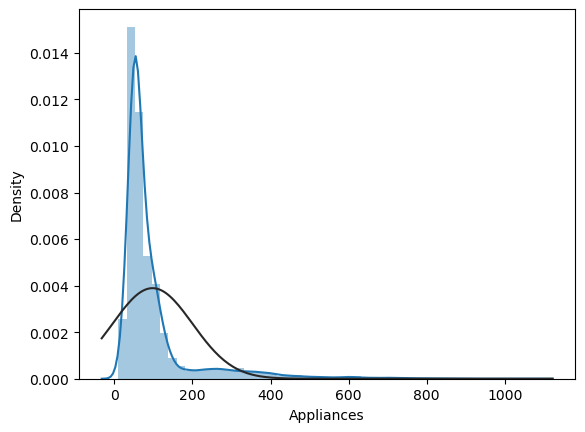

In [7]:
# Let us first visualize the spread of Target Variable 'Appliances'
from scipy.stats import norm
sns.distplot(data['Appliances'], fit=norm)
plt.show()

#### Observation:
The Target Variable Appliances distribution is not normally distributed, it is a little positively skewed with some high energy use.

In [8]:
# copy dataset
new_data = data.copy()
new_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [9]:
#converting date into datetime
new_data['date'] = new_data['date'].astype('datetime64[ns]')
new_data['Date'] = pd.to_datetime(new_data['date']).dt.date
new_data['Time'] = pd.to_datetime(new_data['date']).dt.time
new_data['hour'] = new_data['date'].dt.hour
new_data['month'] = new_data['date'].dt.month
new_data= new_data.drop(["date"], axis=1)
new_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Date,Time,hour,month
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00,17,1
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00,17,1
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00,17,1
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00,17,1
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00,17,5
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00,17,5
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00,17,5
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016-05-27,17:50:00,17,5


In [10]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [11]:
# rename columns
col_names = ['date', 'Appliances', 'lights', 'kitchen_temp', 'kitchen_hum', 'living_temp', 'living_hum','laundry_temp'
             ,'laundry_hum', 'office_temp', 'office_hum', 'bath_temp', 'bath_hum', 'out_b_temp','out_b_hum','iron_temp',
            'iron_hum','teen_temp','teen_hum','par_temp','par_hum','out_temp','Press_mm_hg','out_hum','Windspeed',
             'Visibility', 'Tdewpoint', 'rv1', 'rv2']
data.columns = col_names
data.columns

Index(['date', 'Appliances', 'lights', 'kitchen_temp', 'kitchen_hum',
       'living_temp', 'living_hum', 'laundry_temp', 'laundry_hum',
       'office_temp', 'office_hum', 'bath_temp', 'bath_hum', 'out_b_temp',
       'out_b_hum', 'iron_temp', 'iron_hum', 'teen_temp', 'teen_hum',
       'par_temp', 'par_hum', 'out_temp', 'Press_mm_hg', 'out_hum',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Data visualization

In [12]:
# Calculate the total energy consumed by the appliance per hour
app_hour = new_data.groupby(by='hour',as_index=False)['Appliances'].sum()
# Sort app_hour by descending order
app_hour.sort_values(by='Appliances',ascending=False)

,hour,Appliances
18,18,156670
17,17,133600
19,19,117600
11,11,109430
20,20,104380
10,10,103060
13,13,102540
12,12,101630
16,16,98560
9,9,92710


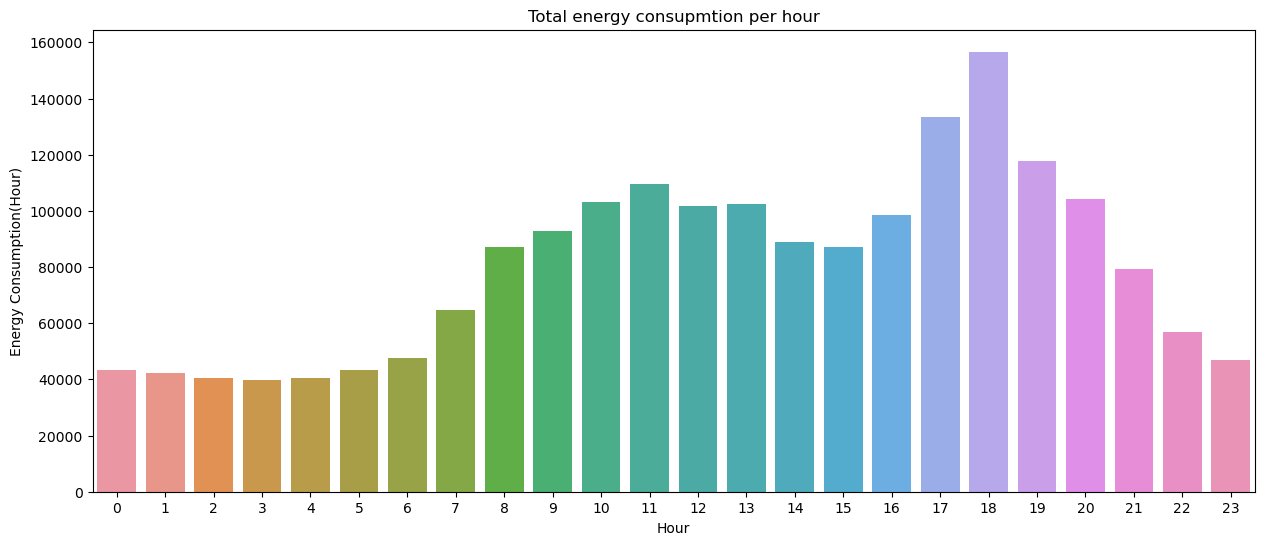

In [13]:
# Create a bar chart to show the total energy consumed by the appliance per hour
plt.subplots(figsize=(15,6))
hour_energy= sns.barplot(app_hour.hour,app_hour.Appliances)
plt.xlabel('Hour')
plt.ylabel('Energy Consumption(Hour)')
plt.title('Total energy consupmtion per hour')
plt.show()

#### Observation:
Peak energy usage is between 5pm-8pm and 10am-1pm, with very little usage between midnight and early morning.

In [14]:
# Compute pairwise correlation of columns
corr=data.corr()
corr

,Appliances,lights,kitchen_temp,kitchen_hum,living_temp,living_hum,laundry_temp,laundry_hum,office_temp,office_hum,...,par_temp,par_hum,out_temp,Press_mm_hg,out_hum,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
kitchen_temp,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
kitchen_hum,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
living_temp,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
living_hum,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
laundry_temp,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
laundry_hum,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
office_temp,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
office_hum,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


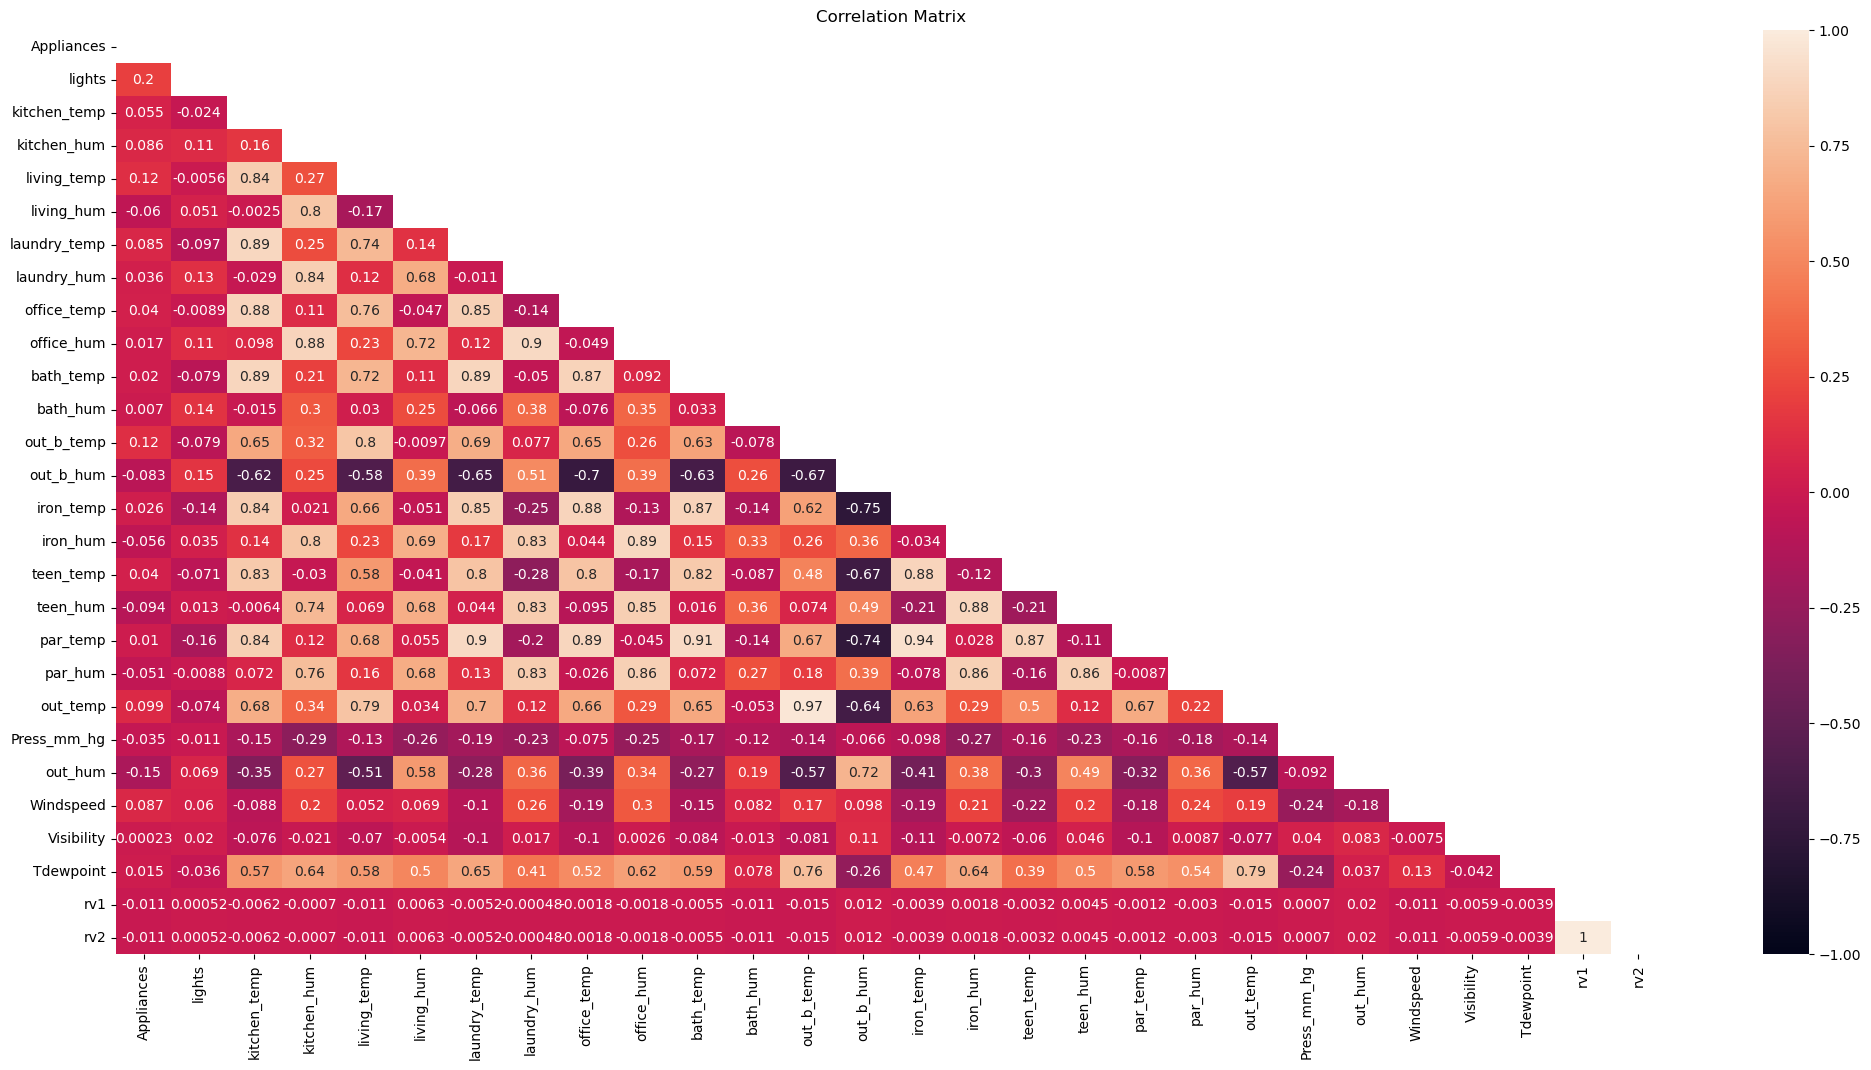

In [15]:
# Print heat map
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(25,12), dpi=100)
sns.heatmap(corr, annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Observation:
* We can see from the heat map that none of the other features have a very significant linear link with the target (the appliance).
* The features of temperature and humidity have a positive link among themselves but a very weak or negative correlation with one another.

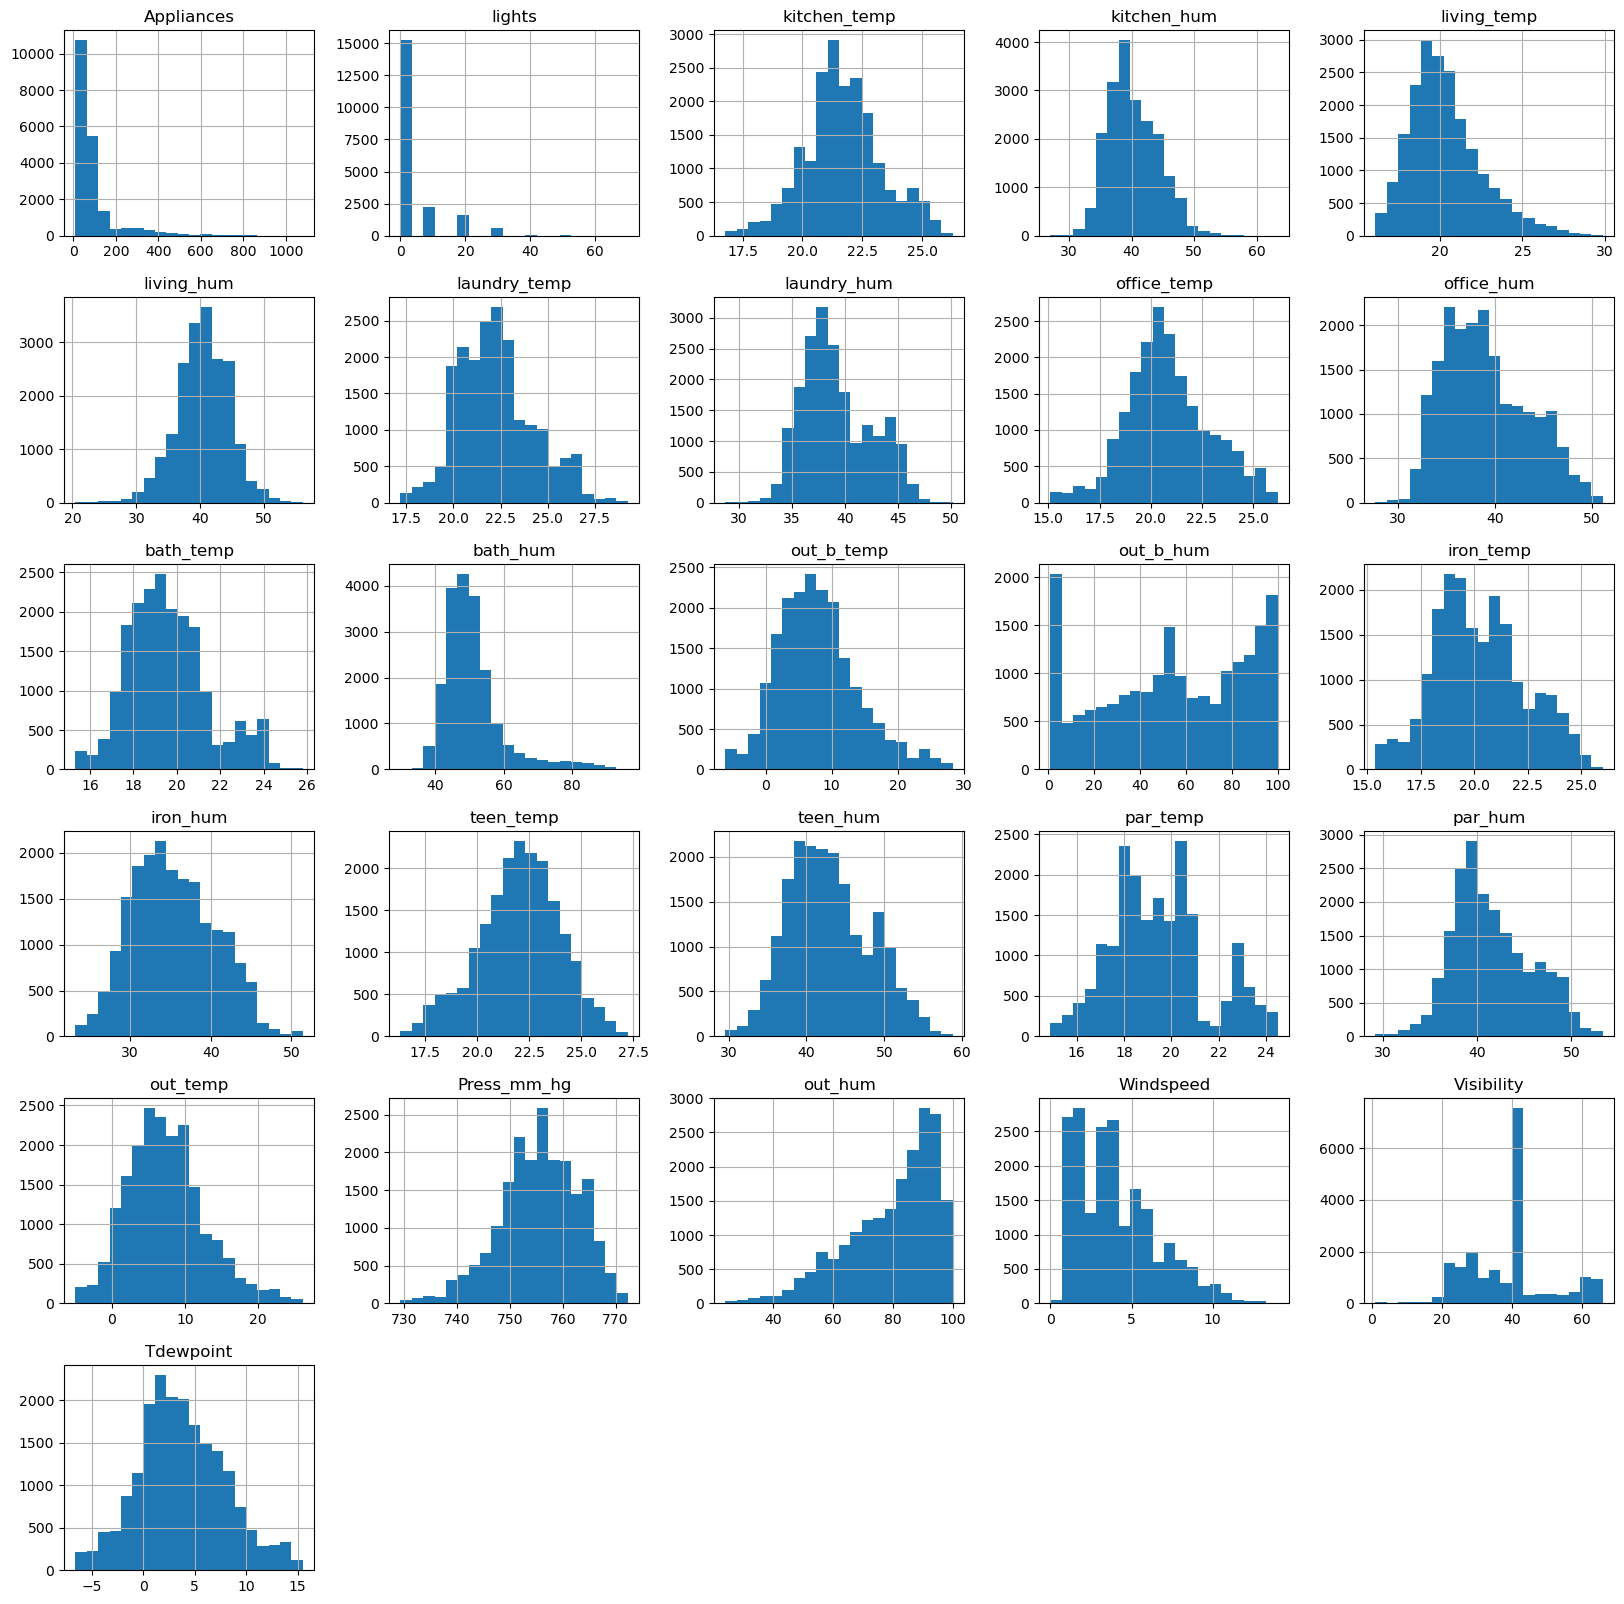

In [16]:
# drop rv1, rv2
data = data.drop(['rv1', 'rv2'], axis=1)
# print histogram
data.hist(figsize=(20,20),bins=20)
plt.show()

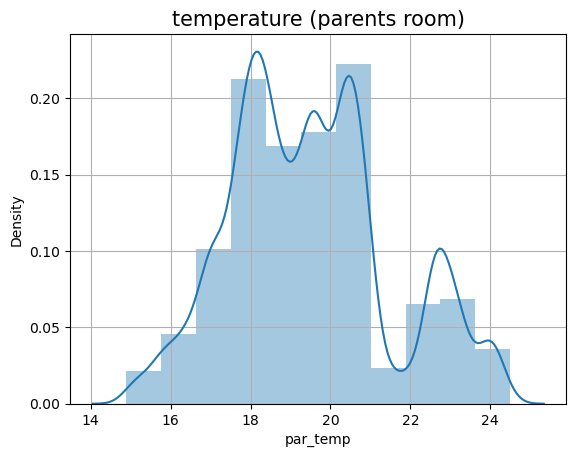

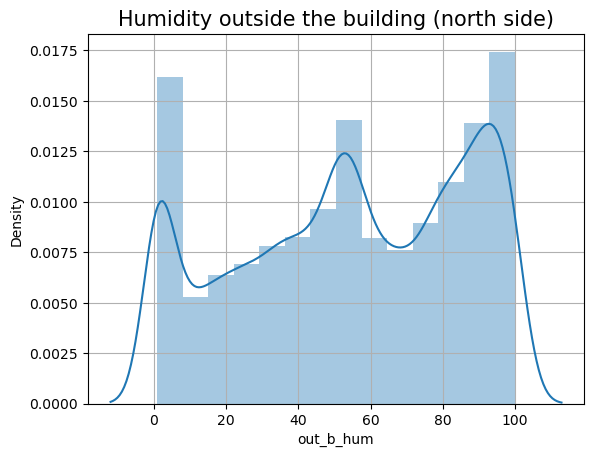

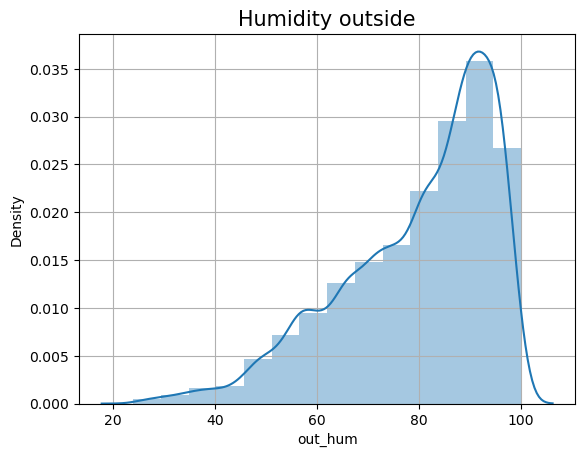

In [17]:
# Looking into par_temp in more detail:
sns.distplot(data.par_temp, bins = 11) # bin width = 1
plt.title('temperature (parents room)', fontsize = 15)
plt.grid()
plt.show()

# Looking into out_b_hum and out_hum
sns.distplot(data.out_b_hum, bins = 14) # bin width = 5
plt.title('Humidity outside the building (north side)', fontsize = 15)
plt.grid()
plt.show()
sns.distplot(data.out_hum, bins = 14) # bin width = 5
plt.title('Humidity outside', fontsize = 15)
plt.grid()
plt.show()

### Observation:
* With an exception of par_temp, all distributions of temperatures appear to follow the normal distribution. 
* With the exception of out_b_hum and out_hum, which are both measurements taken outside, all humidity distributions appear to match the normal distribution, so it makes reasonable that they don't.
* Since bath_hum is positively skewed (bathroom), higher humidity readings may occur when people are taking a shower or bath.

### Time Series Analysis

In [56]:
# copy data
df_time = data.copy()


In [57]:
df_time

,date,Appliances,lights,kitchen_temp,kitchen_hum,living_temp,living_hum,laundry_temp,laundry_hum,office_temp,...,teen_temp,teen_hum,par_temp,par_hum,out_temp,Press_mm_hg,out_hum,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333


In [58]:
# select date and Appliances columns
df_time = df_time[['date', 'Appliances']]
# convert the date column of a DataFrame df to a datetime format
df_time['date'] = pd.to_datetime(df_time['date'])
df_time

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60
...,...,...
19730,2016-05-27 17:20:00,100
19731,2016-05-27 17:30:00,90
19732,2016-05-27 17:40:00,270
19733,2016-05-27 17:50:00,420


In [59]:
# sets the index to be a datetime column and then deletes that column from the DataFrame.
df_time.index = df_time['date']
del df_time['date']
df_time

,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60
...,...
2016-05-27 17:20:00,100
2016-05-27 17:30:00,90
2016-05-27 17:40:00,270


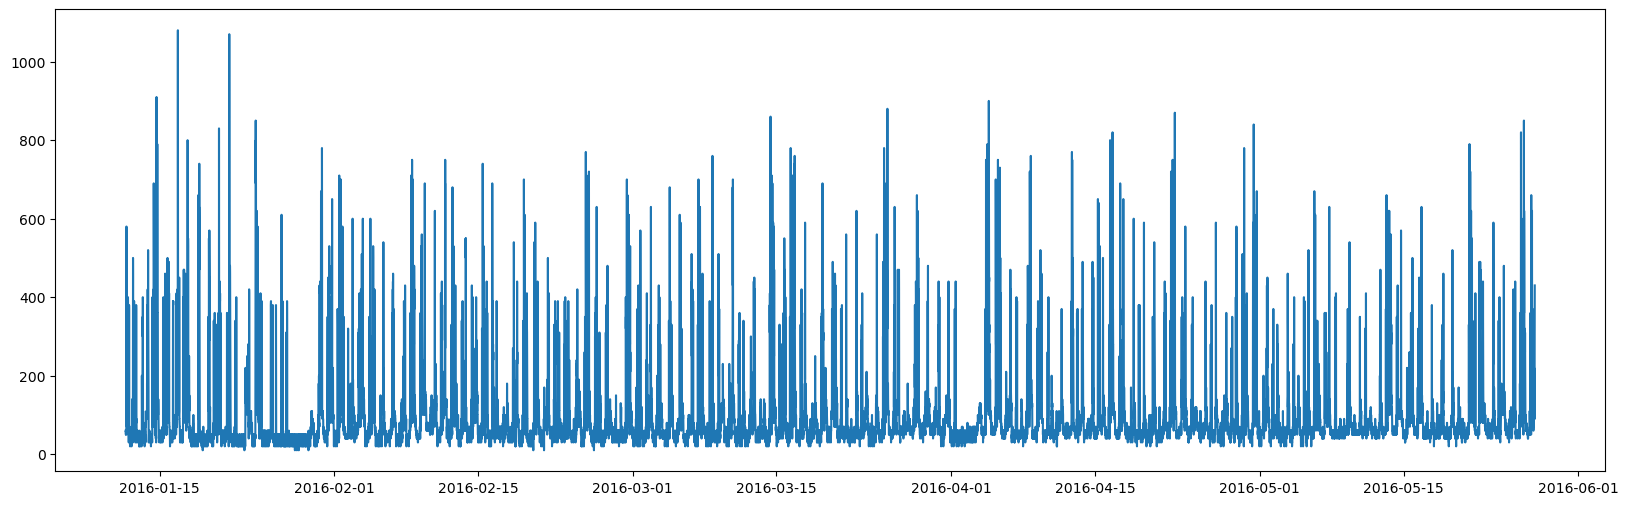

In [60]:
# Plot appliances over time
plt.figure(figsize=(20,6))
plt.plot(df_time['Appliances'])
plt.show()


### Obsevation:
* Appliances using more energy at the beginning of the month.
* Highest usage of appliances in January 2016

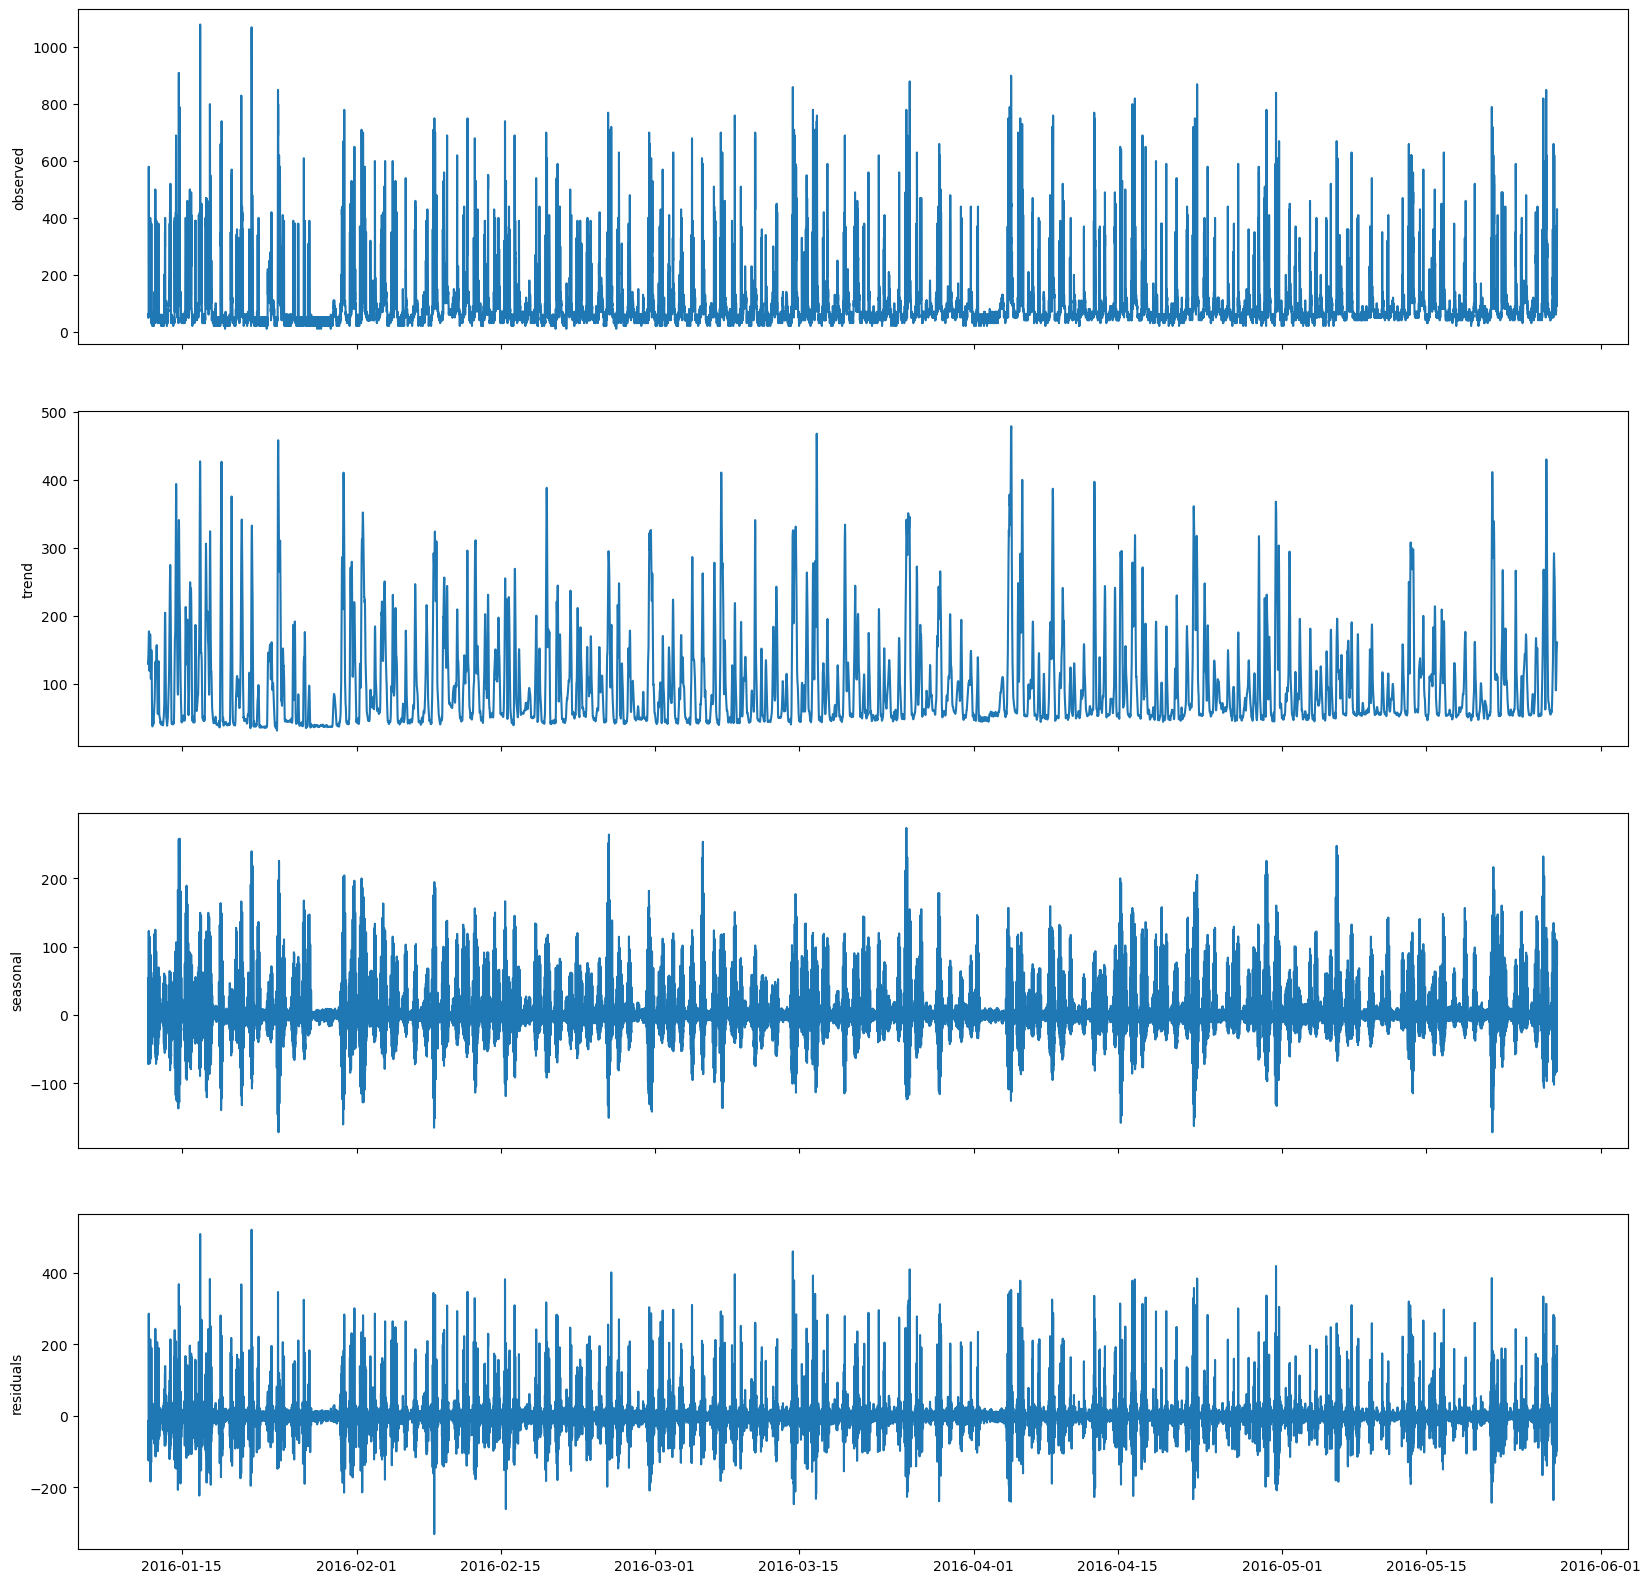

In [23]:
# performs seasonal decomposition of a time series using the Seasonal-Trend Decomposition using Loess (STL) method.
decomposition = STL(df_time['Appliances'], period=12).fit() # the frequncy is monthly

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,20), sharex=True)

#plot
ax1.plot(decomposition.observed)
ax2.plot(decomposition.trend)
ax3.plot(decomposition.seasonal)
ax4.plot(decomposition.resid)

ax1.set_ylabel('observed')
ax2.set_ylabel('trend')
ax3.set_ylabel('seasonal')
ax4.set_ylabel('residuals')

plt.show()

### Obsevation:
* We can see there is no clear trend.
* Seasonal changes seem to be uniformly distributed.

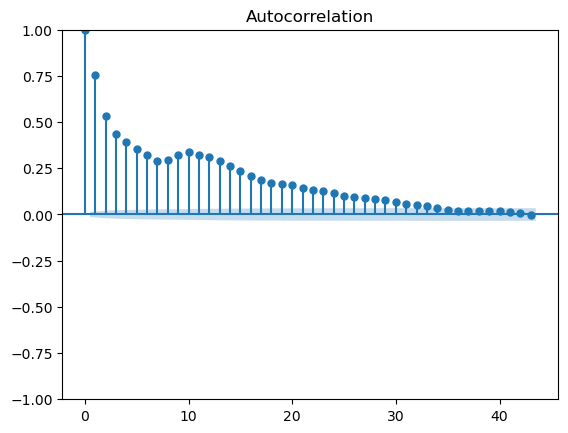

In [24]:
# acf
plot_acf(df_time['Appliances'])
plt.show()

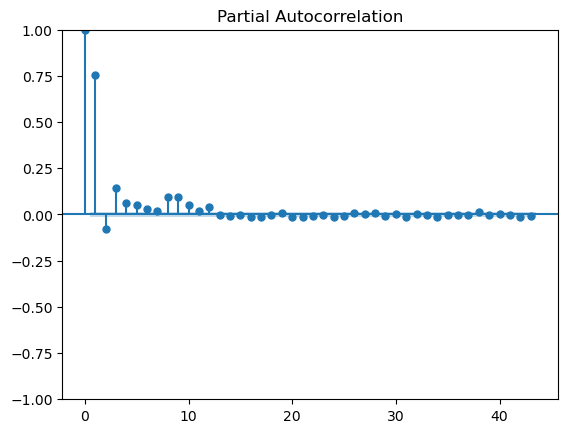

In [25]:
# pacf
plot_pacf(df_time['Appliances'], method='ywm')
plt.show()

In [26]:
# use The Augmented Dickey-Fuller (ADF) test to check the given time series is stationary or not
print(adfuller(df_time['Appliances']))

(-21.616378198036468, 0.0, 11, 19723, {'1%': -3.430681600227742, '5%': -2.8616865555329394, '10%': -2.566848007525354}, 220573.74967981718)


### 3. Implement prediction models

 * Two different time series forecasting models: ARIMA and LSTM(Long Short-Term Memory Network). 
 * The models used in assignment1 were retrained, because the way we can test and train models will be different, and time-series have additional constraints and we want to come up with a 'fair comparison', so we need to find a test-set which works with both model types.

### Time Series

In [27]:
# split train and test data, we use the last 3974 rows of the dataset as a test set.
train_data= df_time[:-3974]['Appliances']
test_data = df_time[-3974:]['Appliances']

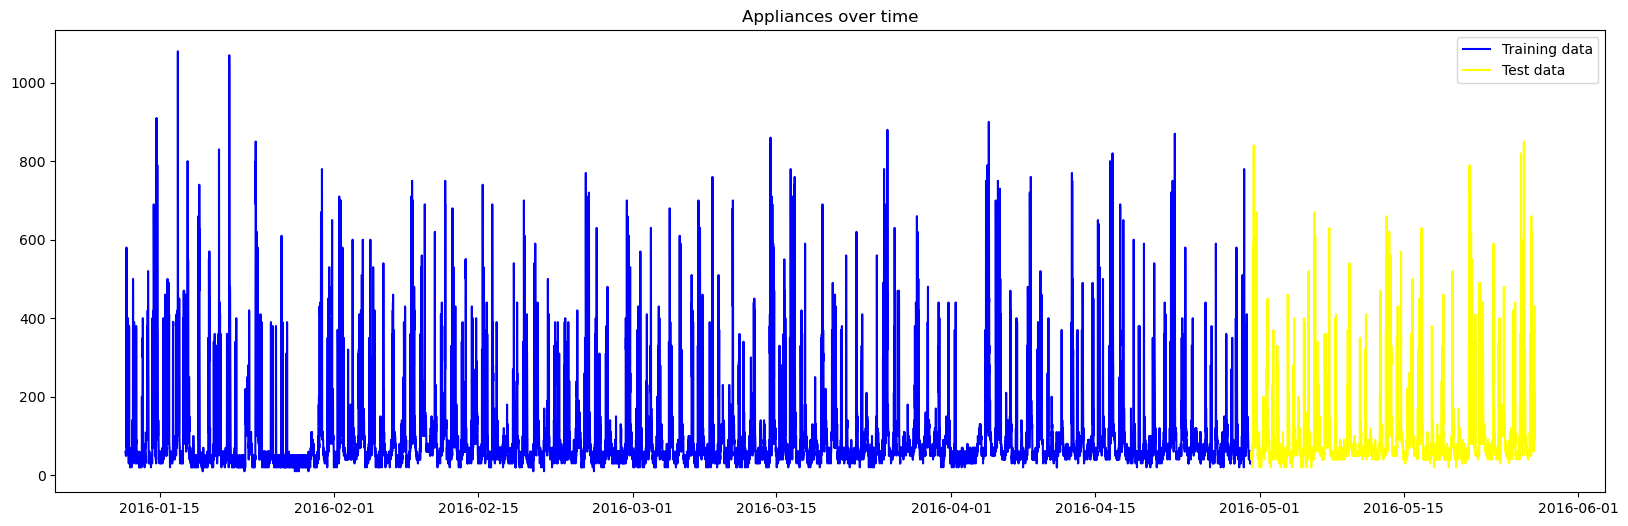

In [28]:
# plot the Appliances over time
plt.figure(figsize=(20,6))
plt.plot(train_data,color='blue')
plt.plot(test_data,color='yellow')
plt.legend(['Training data','Test data'])
plt.title('Appliances over time')
plt.show()

#### ARIMA

In [29]:
# define a function to find the optimal (p, q) parameter combination 
def optimal_pq(endog, order_list, d):

    results = []

    for order in tqdm(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], d, order[1])).fit()
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [30]:
# chose p and q
p = range(0,13,1)
q = range(0,13,1)
d = 0
order_list = list(product(p,q))
pq = optimal_pq(train_data, order_list, d)

  0%|          | 0/169 [00:00<?, ?it/s]

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.38787D+00    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   6.388D+00
  F =   6.3878722948357494     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98378D+00    |proj g|=  5.26078D-02

At iterate    5    f=  5.97372D+00    |proj g|=  1.38526D-02

At iterate   10    f=  5.90435D+00    |proj g|=  2.96070D-01

At iterate   15    f=  5.84915D+00    |proj g|=  8.13369D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   3.869D-06   5.849D+00
  F =   5.8491522196501213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94767D+00    |proj g|=  9.06705D-02

At iterate    5    f=  5.93780D+00    |proj g|=  1.18747D-02

At iterate   10    f=  5.85797D+00    |proj g|=  2.78684D-01

At iterate   15    f=  5.78718D+00    |proj g|=  4.11347D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     20      1     0     0   3.048D-06   5.787D+00
  F =   5.7871673122977274     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.93437D+00    |proj g|=  6.37889D-02

At iterate    5    f=  5.92536D+00    |proj g|=  1.21546D-02

At iterate   10    f=  5.86240D+00    |proj g|=  2.02311D-01

At iterate   15    f=  5.75664D+00    |proj g|=  1.58698D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   1.195D-05   5.756D+00
  F =   5.7564792984477995     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.92962D+00    |proj g|=  7.49226D-02

At iterate    5    f=  5.92186D+00    |proj g|=  6.09723D-03

At iterate   10    f=  5.87962D+00    |proj g|=  1.28170D-01

At iterate   15    f=  5.73874D+00    |proj g|=  1.37715D-02

At iterate   20    f=  5.73848D+00    |proj g|=  7.57439D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   7.574D-06   5.738D+00
  F =   5.7384841622922211     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91779D+00    |proj g|=  6.10594D-02

At iterate    5    f=  5.91059D+00    |proj g|=  5.82115D-03

At iterate   10    f=  5.86534D+00    |proj g|=  1.42441D-01

At iterate   15    f=  5.71581D+00    |proj g|=  1.52102D-02

At iterate   20    f=  5.71499D+00    |proj g|=  3.89398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     24      1     0     0   5.352D-06   5.715D+00
  F =   5.7149867074078093     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.90383D+00    |proj g|=  5.50906D-03

At iterate   10    f=  5.85591D+00    |proj g|=  1.40209D-01

At iterate   15    f=  5.70274D+00    |proj g|=  1.20068D-02

At iterate   20    f=  5.70136D+00    |proj g|=  1.12955D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     21     25      1     0     0   1.452D-05   5.701D+00
  F =   5.7013578495856496     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.90035D+00    |proj g|=  5.59856D-03

At iterate   10    f=  5.85714D+00    |proj g|=  1.22475D-01

At iterate   15    f=  5.69738D+00    |proj g|=  2.03810D-02

At iterate   20    f=  5.69685D+00    |proj g|=  1.07613D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     20     23      1     0     0   1.076D-05   5.697D+00
  F =   5.6968504685941097     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.89580D+00    |proj g|=  7.44287D-03

At iterate   10    f=  5.76001D+00    |proj g|=  2.03618D-01

At iterate   15    f=  5.69562D+00    |proj g|=  1.50020D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     19     24      1     0     0   8.473D-06   5.696D+00
  F =   5.6956098677301696     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.89763D+00    |proj g|=  4.31324D-02


 This problem is unconstrained.



At iterate    5    f=  5.88746D+00    |proj g|=  5.36735D-03

At iterate   10    f=  5.81673D+00    |proj g|=  1.46753D-01

At iterate   15    f=  5.69001D+00    |proj g|=  1.11363D-02

At iterate   20    f=  5.68988D+00    |proj g|=  2.23999D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     20     24      1     0     0   2.240D-06   5.690D+00
  F =   5.6898755200660842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88819D+00    |proj g|=  4.48502D-02

At iterate    5    f=  5.87896D+00    |proj g|=  5.41296D-03

At iterate   10    f=  5.81546D+00    |proj g|=  1.43343D-01

At iterate   15    f=  5.68509D+00    |proj g|=  3.39527D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     19     23      1     0     0   1.205D-05   5.685D+00
  F =   5.6850624103365348     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.87064D+00    |proj g|=  6.73852D-03

At iterate   10    f=  5.82798D+00    |proj g|=  1.37898D-01

At iterate   15    f=  5.68184D+00    |proj g|=  8.42379D-03

At iterate   20    f=  5.68168D+00    |proj g|=  9.72245D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     20     23      1     0     0   9.722D-06   5.682D+00
  F =   5.6816811005068324     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68106D+00    |proj g|=  3.17413D-03

At iterate    5    f=  5.68105D+00    |proj g|=  1.22423D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   3.898D-06   5.681D+00
  F =   5.6810466200155032     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65523D+00    |proj g|=  2.73664D-02


 This problem is unconstrained.



At iterate    5    f=  5.65341D+00    |proj g|=  9.81867D-03

At iterate   10    f=  5.65148D+00    |proj g|=  1.95817D-04

At iterate   15    f=  5.65148D+00    |proj g|=  8.60717D-04

At iterate   20    f=  5.65145D+00    |proj g|=  1.51095D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   8.986D-06   5.651D+00
  F =   5.6514541392028930     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.63952D+00    |proj g|=  2.72113D-03

At iterate   10    f=  5.63797D+00    |proj g|=  6.68775D-03

At iterate   15    f=  5.63782D+00    |proj g|=  1.56454D-04

At iterate   20    f=  5.63782D+00    |proj g|=  1.17169D-03

At iterate   25    f=  5.63779D+00    |proj g|=  1.92679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   1.159D-05   5.638D+00
  F =   5.6377942658718974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.63547D+00    |proj g|=  3.44281D-04

At iterate   10    f=  5.63545D+00    |proj g|=  3.83038D-03

At iterate   15    f=  5.63542D+00    |proj g|=  2.17797D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   2.171D-05   5.635D+00
  F =   5.6354175099543893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63503D+00    |proj g|=  6.80950D-03

At iterate    5    f=  5.63497D+00    |proj g|=  2.10773D-04

At iterate   10    f=  5.63496D+00    |proj g|=  2.05863D-03

At iterate   15    f=  5.63492D+00    |proj g|=  1.13925D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     20      1     0     0   1.784D-06   5.635D+00
  F =   5.6349169072588277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63519D+00    |proj g|=  7.56537D-03

At iterate    5    f=  5.63508D+00    |proj g|=  4.75274D-04

At iterate   10    f=  5.63496D+00    |proj g|=  7.14803D-03

At iterate   15    f=  5.63490D+00    |proj g|=  6.61773D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     18      1     0     0   6.618D-06   5.635D+00
  F =   5.6348972675025344     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63439D+00    |proj g|=  1.67516D-02

At iterate    5    f=  5.63391D+00    |proj g|=  1.00042D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      7      9      1     0     0   6.665D-05   5.634D+00
  F =   5.6339092634600805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63511D+00    |proj g|=  1.38545D-02

At iterate    5    f=  5.63402D+00    |proj g|=  1.48409D-03

At iterate   10    f=  5.63402D+00    |proj g|=  5.43290D-04

At iterate   15    f=  5.63395D+00    |proj g|=  5.12075D-03

At iterate   20    f=  5.63390D+00    |proj g|=  1.55870D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     22     25      1     0     0   7.347D-05   5.634D+00
  F =   5.6338998269796488     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.63260D+00    |proj g|=  7.16409D-04

At iterate   10    f=  5.63259D+00    |proj g|=  7.80485D-04

At iterate   15    f=  5.63256D+00    |proj g|=  1.77010D-03

At iterate   20    f=  5.63255D+00    |proj g|=  4.89069D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     21     24      1     0     0   2.172D-05   5.633D+00
  F =   5.6325543087834884     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.63025D+00    |proj g|=  2.22556D-04

At iterate   10    f=  5.63025D+00    |proj g|=  9.27437D-04

At iterate   15    f=  5.63024D+00    |proj g|=  6.78888D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     18     22      1     0     0   1.285D-05   5.630D+00
  F =   5.6302412834843825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63033D+00    |proj g|=  7.24954D-03


 This problem is unconstrained.



At iterate    5    f=  5.63025D+00    |proj g|=  2.55390D-04

At iterate   10    f=  5.63024D+00    |proj g|=  1.50638D-03

At iterate   15    f=  5.63022D+00    |proj g|=  3.12186D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     18     22      1     0     0   3.086D-05   5.630D+00
  F =   5.6302187517006415     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63040D+00    |proj g|=  9.94107D-03

At iterate    5    f=  5.63025D+00    |proj g|=  2.44991D-04

At iterate   10    f=  5.63022D+00    |proj g|=  3.04844D-03

At iterate   15    f=  5.63018D+00    |proj g|=  1.96152D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     16     19      1     0     0   2.463D-05   5.630D+00
  F =   5.6301812731556709     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.29564D+00    |proj g|=  3.71116D+00

At iterate    5    f=  5.67809D+00    |proj g|=  2.43481D-03

At iterate   10    f=  5.67803D+00    |proj g|=  2.04006D-03

At iterate   15    f=  5.67786D+00    |proj g|=  4.23134D-03

At iterate   20    f=  5.67782D+00    |proj g|=  1.03754D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     22      1     0     0   2.239D-06   5.678D+00
  F =   5.6778153186147771     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.63564D+00    |proj g|=  8.53372D-03

At iterate   10    f=  5.63544D+00    |proj g|=  1.93526D-03

At iterate   15    f=  5.63512D+00    |proj g|=  1.50315D-02

At iterate   20    f=  5.63490D+00    |proj g|=  1.50941D-04

At iterate   25    f=  5.63486D+00    |proj g|=  1.93032D-03

At iterate   30    f=  5.63479D+00    |proj g|=  9.52953D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     36      1     0     0   1.354D-05   5.635D+00
  F =   5.6347923359294940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.64066D+00    |proj g|=  3.56124D-03

At iterate   10    f=  5.64002D+00    |proj g|=  5.99881D-03

At iterate   15    f=  5.63623D+00    |proj g|=  2.82941D-02

At iterate   20    f=  5.63492D+00    |proj g|=  7.18175D-03

At iterate   25    f=  5.63481D+00    |proj g|=  3.86581D-04

At iterate   30    f=  5.63479D+00    |proj g|=  1.10724D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     40      1     0     0   4.847D-05   5.635D+00
  F =   5.6347909563281702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.70727D+00    |proj g|=  1.38072D-01

At iterate   10    f=  5.64778D+00    |proj g|=  7.94473D-02

At iterate   15    f=  5.63774D+00    |proj g|=  1.31395D-02

At iterate   20    f=  5.63758D+00    |proj g|=  3.73972D-04

At iterate   25    f=  5.63724D+00    |proj g|=  1.88021D-02

At iterate   30    f=  5.63584D+00    |proj g|=  5.42009D-03

At iterate   35    f=  5.63503D+00    |proj g|=  7.25934D-03

At iterate   40    f=  5.63489D+00    |proj g|=  3.57641D-04

At iterate   45    f=  5.63488D+00    |proj g|=  5.85878D-04

At iterate   50    f=  5.63486D+00    |proj g|=  2.40127D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63488D+00    |proj g|=  4.69189D-03

At iterate    5    f=  5.63486D+00    |proj g|=  3.54931D-04

At iterate   10    f=  5.63485D+00    |proj g|=  1.24902D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13     16      1     0     0   4.524D-05   5.635D+00
  F =   5.6348478077221467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63531D+00    |proj g|=  4.85404D-03

At iterate    5    f=  5.63516D+00    |proj g|=  6.05271D-03

At iterate   10    f=  5.63482D+00    |proj g|=  3.78554D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     18      1     0     0   4.722D-05   5.635D+00
  F =   5.6348162207894905     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  5.63443D+00    |proj g|=  7.88457D-04

At iterate   10    f=  5.63440D+00    |proj g|=  4.07338D-03

At iterate   15    f=  5.63423D+00    |proj g|=  6.55553D-04

At iterate   20    f=  5.63423D+00    |proj g|=  2.47450D-04

At iterate   25    f=  5.63421D+00    |proj g|=  3.68511D-03

At iterate   30    f=  5.63400D+00    |proj g|=  3.53768D-03

At iterate   35    f=  5.63397D+00    |proj g|=  5.61875D-04

At iterate   40    f=  5.63396D+00    |proj g|=  1.94912D-03

At iterate   45    f=  5.63390D+00    |proj g|=  9.27808D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     48     51   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63625D+00    |proj g|=  2.57702D-02

At iterate    5    f=  5.63367D+00    |proj g|=  3.91147D-03

At iterate   10    f=  5.63350D+00    |proj g|=  8.35412D-03

At iterate   15    f=  5.63322D+00    |proj g|=  4.46097D-04

At iterate   20    f=  5.63322D+00    |proj g|=  3.59799D-04

At iterate   25    f=  5.63318D+00    |proj g|=  3.57430D-03

At iterate   30    f=  5.63311D+00    |proj g|=  3.09218D-04

At iterate   35    f=  5.63311D+00    |proj g|=  1.29871D-04

At iterate   40    f=  5.63311D+00    |proj g|=  7.64684D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  5.63141D+00    |proj g|=  2.13555D-04

At iterate   10    f=  5.63140D+00    |proj g|=  1.03332D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     14     18      1     0     0   1.361D-05   5.631D+00
  F =   5.6314022685262861     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63048D+00    |proj g|=  9.02977D-03

At iterate    5    f=  5.63035D+00    |proj g|=  1.74234D-03

At iterate   10    f=  5.63026D+00    |proj g|=  2.11989D-04

At iterate   15    f=  5.63026D+00    |proj g|=  3.46313D-04

At iterate   20    f=  5.63024D+00    |proj g|=  2.03635D-03

At iterate   25    f=  5.63023D+00    |proj g|=  7.72899D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     26     30      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  5.63025D+00    |proj g|=  9.27021D-04

At iterate   10    f=  5.63020D+00    |proj g|=  2.21489D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     14     17      1     0     0   2.839D-05   5.630D+00
  F =   5.6301947231541485     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63043D+00    |proj g|=  9.10842D-03


 This problem is unconstrained.



At iterate    5    f=  5.63026D+00    |proj g|=  1.56802D-03

At iterate   10    f=  5.63017D+00    |proj g|=  5.82267D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     13     16      1     0     0   3.711D-05   5.630D+00
  F =   5.6301676966408625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66243D+00    |proj g|=  2.89024D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.29561D+00    |proj g|=  3.71110D+00


 This problem is unconstrained.



At iterate    5    f=  5.67457D+00    |proj g|=  2.69653D-02

At iterate   10    f=  5.67046D+00    |proj g|=  2.32421D-02

At iterate   15    f=  5.64499D+00    |proj g|=  1.67808D-02

At iterate   20    f=  5.63766D+00    |proj g|=  6.03934D-03

At iterate   25    f=  5.63624D+00    |proj g|=  2.30576D-03

At iterate   30    f=  5.63601D+00    |proj g|=  2.14293D-03

At iterate   35    f=  5.63574D+00    |proj g|=  5.76283D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     42      1     0     0   3.005D-05   5.636D+00
  F =   5.6357398775601766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  5.63534D+00    |proj g|=  6.51618D-03

At iterate   10    f=  5.63517D+00    |proj g|=  5.99263D-03

At iterate   15    f=  5.63503D+00    |proj g|=  1.18697D-03

At iterate   20    f=  5.63485D+00    |proj g|=  3.72325D-03

At iterate   25    f=  5.63480D+00    |proj g|=  3.91225D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     30      1     0     0   3.912D-05   5.635D+00
  F =   5.6347991899624832     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37764D+00    |proj g|=  3.89613D+00

At iterate    5    f=  5.66976D+00    |proj g|=  3.31814D-02

At iterate   10    f=  5.66492D+00    |proj g|=  5.14529D-02

At iterate   15    f=  5.63575D+00    |proj g|=  3.65913D-03

At iterate   20    f=  5.63464D+00    |proj g|=  2.96315D-03

At iterate   25    f=  5.63461D+00    |proj g|=  3.55542D-04

At iterate   30    f=  5.63457D+00    |proj g|=  9.47802D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  6.18263D+00    |proj g|=  7.00576D-01

At iterate   10    f=  5.65125D+00    |proj g|=  4.13959D-02

At iterate   15    f=  5.63998D+00    |proj g|=  5.56332D-03

At iterate   20    f=  5.63629D+00    |proj g|=  1.26469D-02

At iterate   25    f=  5.63462D+00    |proj g|=  1.02120D-03

At iterate   30    f=  5.63456D+00    |proj g|=  4.36556D-04

At iterate   35    f=  5.63456D+00    |proj g|=  2.44083D-04

At iterate   40    f=  5.63455D+00    |proj g|=  7.96568D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     49      1     0     0   1.079D-05   5.635D+00
  F =   5.63454912823

 This problem is unconstrained.



At iterate    5    f=  5.63594D+00    |proj g|=  3.07114D-03

At iterate   10    f=  5.63570D+00    |proj g|=  9.55752D-04

At iterate   15    f=  5.63537D+00    |proj g|=  8.94814D-03

At iterate   20    f=  5.63470D+00    |proj g|=  5.47200D-03

At iterate   25    f=  5.63465D+00    |proj g|=  9.87062D-04

At iterate   30    f=  5.63465D+00    |proj g|=  4.45372D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     31     35      1     0     0   4.050D-05   5.635D+00
  F =   5.6346451867008565     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63537D+00    |proj g|=  3.44480D-02

At iterate    5    f=  5.63459D+00    |proj g|=  6.44903D-03

At iterate   10    f=  5.63379D+00    |proj g|=  7.52920D-03

At iterate   15    f=  5.63357D+00    |proj g|=  3.52757D-03

At iterate   20    f=  5.63307D+00    |proj g|=  1.28960D-02

At iterate   25    f=  5.63226D+00    |proj g|=  5.26452D-03

At iterate   30    f=  5.63207D+00    |proj g|=  7.25184D-04

At iterate   35    f=  5.63207D+00    |proj g|=  5.50621D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  5.63237D+00    |proj g|=  9.31036D-04

At iterate   10    f=  5.63228D+00    |proj g|=  4.74975D-03

At iterate   15    f=  5.63226D+00    |proj g|=  2.81543D-04

At iterate   20    f=  5.63225D+00    |proj g|=  7.48625D-04

At iterate   25    f=  5.63224D+00    |proj g|=  2.30452D-04

At iterate   30    f=  5.63221D+00    |proj g|=  1.04557D-02

At iterate   35    f=  5.63192D+00    |proj g|=  9.86772D-03

At iterate   40    f=  5.63188D+00    |proj g|=  3.95700D-04

At iterate   45    f=  5.63187D+00    |proj g|=  9.35586D-05

At iterate   50    f=  5.63187D+00    |proj g|=  1.48964D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.63196D+00    |proj g|=  1.23432D-03

At iterate   10    f=  5.63189D+00    |proj g|=  4.61100D-03

At iterate   15    f=  5.63171D+00    |proj g|=  2.55760D-03

At iterate   20    f=  5.63129D+00    |proj g|=  1.35779D-02

At iterate   25    f=  5.63084D+00    |proj g|=  5.64600D-04

At iterate   30    f=  5.63082D+00    |proj g|=  1.44000D-03

At iterate   35    f=  5.63080D+00    |proj g|=  2.26250D-04

At iterate   40    f=  5.63079D+00    |proj g|=  1.57415D-03

At iterate   45    f=  5.63078D+00    |proj g|=  1.10590D-03

At iterate   50    f=  5.63067D+00    |proj g|=  1.04127D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.63089D+00    |proj g|=  8.75145D-04

At iterate   10    f=  5.63082D+00    |proj g|=  3.12991D-03

At iterate   15    f=  5.63079D+00    |proj g|=  1.01630D-03

At iterate   20    f=  5.63074D+00    |proj g|=  4.07370D-04

At iterate   25    f=  5.63074D+00    |proj g|=  1.83498D-04

At iterate   30    f=  5.63073D+00    |proj g|=  1.79066D-03

At iterate   35    f=  5.63071D+00    |proj g|=  5.14830D-04

At iterate   40    f=  5.63069D+00    |proj g|=  1.99068D-03

At iterate   45    f=  5.63067D+00    |proj g|=  1.70911D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     45     52   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63041D+00    |proj g|=  8.15011D-03

At iterate    5    f=  5.63030D+00    |proj g|=  1.88345D-03

At iterate   10    f=  5.63025D+00    |proj g|=  1.58075D-04

At iterate   15    f=  5.63024D+00    |proj g|=  1.48159D-03

At iterate   20    f=  5.63023D+00    |proj g|=  8.92785D-05

At iterate   25    f=  5.63023D+00    |proj g|=  1.04228D-03

At iterate   30    f=  5.63020D+00    |proj g|=  1.19561D-03

At iterate   35    f=  5.63020D+00    |proj g|=  1.06003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63026D+00    |proj g|=  5.72731D-03

At iterate    5    f=  5.63021D+00    |proj g|=  8.95167D-04

At iterate   10    f=  5.63019D+00    |proj g|=  5.27919D-04

At iterate   15    f=  5.63019D+00    |proj g|=  3.50832D-04

At iterate   20    f=  5.63018D+00    |proj g|=  3.69784D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     23     27      1     0     0   2.008D-05   5.630D+00
  F =   5.6301831658950672     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.63024D+00    |proj g|=  7.55816D-04

At iterate   10    f=  5.63021D+00    |proj g|=  2.55216D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     12     16      1     0     0   4.701D-05   5.630D+00
  F =   5.6302083148781588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65688D+00    |proj g|=  2.83094D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31379D+00    |proj g|=  3.75234D+00


 This problem is unconstrained.



At iterate    5    f=  5.66293D+00    |proj g|=  2.50605D-02

At iterate   10    f=  5.66048D+00    |proj g|=  2.52272D-03

At iterate   15    f=  5.65989D+00    |proj g|=  5.92076D-02

At iterate   20    f=  5.65340D+00    |proj g|=  2.51519D-02

At iterate   25    f=  5.64363D+00    |proj g|=  3.27479D-02

At iterate   30    f=  5.63600D+00    |proj g|=  9.24189D-03

At iterate   35    f=  5.63541D+00    |proj g|=  2.35831D-03

At iterate   40    f=  5.63534D+00    |proj g|=  4.95160D-03

At iterate   45    f=  5.63486D+00    |proj g|=  1.93546D-03

At iterate   50    f=  5.63483D+00    |proj g|=  1.84032D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.64051D+00    |proj g|=  1.06384D-02

At iterate   10    f=  5.63608D+00    |proj g|=  2.96600D-03

At iterate   15    f=  5.63590D+00    |proj g|=  5.46234D-04

At iterate   20    f=  5.63573D+00    |proj g|=  4.33817D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   2.254D-05   5.636D+00
  F =   5.6357223551761537     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.67653D+00    |proj g|=  2.98963D-02

At iterate   10    f=  5.66581D+00    |proj g|=  2.25779D-02

At iterate   15    f=  5.65260D+00    |proj g|=  6.17716D-02

At iterate   20    f=  5.63527D+00    |proj g|=  1.27842D-02

At iterate   25    f=  5.63461D+00    |proj g|=  1.13762D-03

At iterate   30    f=  5.63460D+00    |proj g|=  2.87708D-04

At iterate   35    f=  5.63459D+00    |proj g|=  1.26217D-03

At iterate   40    f=  5.63455D+00    |proj g|=  4.31344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     45      1     0     0   1.410D-05   5.635D+00
  F =   5.63455353842

 This problem is unconstrained.



At iterate    5    f=  6.66941D+00    |proj g|=  1.49979D+00

At iterate   10    f=  5.65809D+00    |proj g|=  5.02495D-02

At iterate   15    f=  5.64331D+00    |proj g|=  4.63411D-02

At iterate   20    f=  5.63460D+00    |proj g|=  2.88001D-03

At iterate   25    f=  5.63455D+00    |proj g|=  1.45883D-04

At iterate   30    f=  5.63455D+00    |proj g|=  1.38632D-04

At iterate   35    f=  5.63454D+00    |proj g|=  1.43018D-03

At iterate   40    f=  5.63454D+00    |proj g|=  4.98009D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     43      1     0     0   4.980D-05   5.635D+00
  F =   5.63454004452

 This problem is unconstrained.



At iterate    5    f=  5.63465D+00    |proj g|=  1.90803D-02

At iterate   10    f=  5.63455D+00    |proj g|=  3.32609D-03

At iterate   15    f=  5.63438D+00    |proj g|=  1.60373D-03

At iterate   20    f=  5.63430D+00    |proj g|=  8.02372D-03

At iterate   25    f=  5.63424D+00    |proj g|=  1.09665D-04

At iterate   30    f=  5.63424D+00    |proj g|=  6.20685D-04

At iterate   35    f=  5.63421D+00    |proj g|=  2.43340D-03

At iterate   40    f=  5.63421D+00    |proj g|=  3.65775D-04

At iterate   45    f=  5.63418D+00    |proj g|=  4.23304D-03

At iterate   50    f=  5.63401D+00    |proj g|=  1.28488D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.63440D+00    |proj g|=  4.88495D-03

At iterate   10    f=  5.63374D+00    |proj g|=  3.32514D-03

At iterate   15    f=  5.63337D+00    |proj g|=  5.24010D-03

At iterate   20    f=  5.63306D+00    |proj g|=  5.01833D-04

At iterate   25    f=  5.63306D+00    |proj g|=  9.96373D-05

At iterate   30    f=  5.63304D+00    |proj g|=  2.25353D-03

At iterate   35    f=  5.63299D+00    |proj g|=  3.59276D-04

At iterate   40    f=  5.63298D+00    |proj g|=  1.86740D-04

At iterate   45    f=  5.63298D+00    |proj g|=  1.29042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     46     51   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63286D+00    |proj g|=  7.10229D-03

At iterate    5    f=  5.63254D+00    |proj g|=  1.17418D-03

At iterate   10    f=  5.63241D+00    |proj g|=  2.90916D-03

At iterate   15    f=  5.63239D+00    |proj g|=  1.52532D-03

At iterate   20    f=  5.63237D+00    |proj g|=  2.22477D-04

At iterate   25    f=  5.63236D+00    |proj g|=  2.78221D-03

At iterate   30    f=  5.63210D+00    |proj g|=  2.01915D-02

At iterate   35    f=  5.63197D+00    |proj g|=  1.72706D-03

At iterate   40    f=  5.63196D+00    |proj g|=  8.03434D-04

At iterate   45    f=  5.63190D+00    |proj g|=  5.30713D-03

At iterate   50    f=  5.63187D+00    |proj g|=  1.37480D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63260D+00    |proj g|=  2.20271D-02

At iterate    5    f=  5.63191D+00    |proj g|=  1.44516D-03

At iterate   10    f=  5.63171D+00    |proj g|=  1.19923D-02

At iterate   15    f=  5.63149D+00    |proj g|=  1.63639D-03

At iterate   20    f=  5.63132D+00    |proj g|=  2.47254D-03

At iterate   25    f=  5.63124D+00    |proj g|=  7.23716D-03

At iterate   30    f=  5.63075D+00    |proj g|=  1.69311D-03

At iterate   35    f=  5.63070D+00    |proj g|=  2.11890D-03

At iterate   40    f=  5.63066D+00    |proj g|=  1.12427D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  5.63082D+00    |proj g|=  7.23733D-04

At iterate   10    f=  5.63077D+00    |proj g|=  2.99456D-03

At iterate   15    f=  5.63074D+00    |proj g|=  1.33737D-03

At iterate   20    f=  5.63070D+00    |proj g|=  1.64857D-04

At iterate   25    f=  5.63070D+00    |proj g|=  2.19380D-04

At iterate   30    f=  5.63069D+00    |proj g|=  2.34890D-03

At iterate   35    f=  5.63066D+00    |proj g|=  1.48569D-03

At iterate   40    f=  5.63066D+00    |proj g|=  2.32863D-04

At iterate   45    f=  5.63066D+00    |proj g|=  2.32732D-04

At iterate   50    f=  5.63065D+00    |proj g|=  7.98281D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.63064D+00    |proj g|=  4.71716D-03

At iterate   10    f=  5.63036D+00    |proj g|=  2.35919D-04

At iterate   15    f=  5.63035D+00    |proj g|=  3.38343D-03

At iterate   20    f=  5.63032D+00    |proj g|=  5.19396D-04

At iterate   25    f=  5.63032D+00    |proj g|=  2.35016D-04

At iterate   30    f=  5.63029D+00    |proj g|=  2.72003D-03

At iterate   35    f=  5.63027D+00    |proj g|=  4.01454D-04

At iterate   40    f=  5.63026D+00    |proj g|=  8.73542D-04

At iterate   45    f=  5.63023D+00    |proj g|=  1.70044D-03

At iterate   50    f=  5.63019D+00    |proj g|=  1.64380D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.63052D+00    |proj g|=  6.41129D-03

At iterate   10    f=  5.63025D+00    |proj g|=  6.45399D-04

At iterate   15    f=  5.63024D+00    |proj g|=  3.64996D-03

At iterate   20    f=  5.63015D+00    |proj g|=  5.84440D-04

At iterate   25    f=  5.63013D+00    |proj g|=  3.25202D-03

At iterate   30    f=  5.62987D+00    |proj g|=  6.37493D-03

At iterate   35    f=  5.62971D+00    |proj g|=  2.05070D-03

At iterate   40    f=  5.62966D+00    |proj g|=  1.06588D-03

At iterate   45    f=  5.62964D+00    |proj g|=  1.50141D-04

At iterate   50    f=  5.62962D+00    |proj g|=  1.73952D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63093D+00    |proj g|=  1.33084D-02

At iterate    5    f=  5.63051D+00    |proj g|=  4.53408D-03

At iterate   10    f=  5.63028D+00    |proj g|=  3.77605D-04

At iterate   15    f=  5.63026D+00    |proj g|=  2.66568D-03

At iterate   20    f=  5.63021D+00    |proj g|=  3.45285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     22     29      1     0     0   4.251D-05   5.630D+00
  F =   5.6302138091907583     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32775D+00    |proj g|=  3.78391D+00


 This problem is unconstrained.



At iterate    5    f=  5.65888D+00    |proj g|=  3.16274D-02

At iterate   10    f=  5.65543D+00    |proj g|=  1.85626D-03

At iterate   15    f=  5.65422D+00    |proj g|=  3.79788D-02

At iterate   20    f=  5.65008D+00    |proj g|=  1.42757D-02

At iterate   25    f=  5.64142D+00    |proj g|=  5.16541D-02

At iterate   30    f=  5.63518D+00    |proj g|=  2.84361D-03

At iterate   35    f=  5.63512D+00    |proj g|=  5.39762D-04

At iterate   40    f=  5.63506D+00    |proj g|=  2.14212D-03

At iterate   45    f=  5.63477D+00    |proj g|=  2.40914D-03

At iterate   50    f=  5.63476D+00    |proj g|=  4.93974D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.65857D+00    |proj g|=  1.12291D-02

At iterate   10    f=  5.65766D+00    |proj g|=  2.10854D-02

At iterate   15    f=  5.65320D+00    |proj g|=  4.75516D-02

At iterate   20    f=  5.63857D+00    |proj g|=  3.41492D-02

At iterate   25    f=  5.63513D+00    |proj g|=  5.18574D-03

At iterate   30    f=  5.63503D+00    |proj g|=  5.44027D-04

At iterate   35    f=  5.63483D+00    |proj g|=  6.20102D-03

At iterate   40    f=  5.63467D+00    |proj g|=  6.76563D-04

At iterate   45    f=  5.63467D+00    |proj g|=  8.14992D-05

At iterate   50    f=  5.63466D+00    |proj g|=  9.38605D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.66815D+00    |proj g|=  3.60313D-02

At iterate   10    f=  5.65891D+00    |proj g|=  3.38892D-02

At iterate   15    f=  5.64456D+00    |proj g|=  1.67030D-01

At iterate   20    f=  5.63523D+00    |proj g|=  6.51741D-03

At iterate   25    f=  5.63510D+00    |proj g|=  1.86142D-03

At iterate   30    f=  5.63508D+00    |proj g|=  3.28378D-03

At iterate   35    f=  5.63495D+00    |proj g|=  4.17320D-03

At iterate   40    f=  5.63476D+00    |proj g|=  3.88379D-03

At iterate   45    f=  5.63461D+00    |proj g|=  3.17763D-03

At iterate   50    f=  5.63454D+00    |proj g|=  1.50189D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39758D+00    |proj g|=  3.94073D+00

At iterate    5    f=  5.67205D+00    |proj g|=  2.95402D-02

At iterate   10    f=  5.65946D+00    |proj g|=  3.42772D-02

At iterate   15    f=  5.65057D+00    |proj g|=  8.01618D-02

At iterate   20    f=  5.63476D+00    |proj g|=  3.33928D-03

At iterate   25    f=  5.63471D+00    |proj g|=  2.00054D-03

At iterate   30    f=  5.63469D+00    |proj g|=  1.41190D-03

At iterate   35    f=  5.63468D+00    |proj g|=  3.19699D-04

At iterate   40    f=  5.63468D+00    |proj g|=  2.11847D-04

At iterate   45    f=  5.63466D+00    |proj g|=  2.96002D-03

At iterate   50    f=  5.63459D+00    |proj g|=  1.58305D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32949D+02    |proj g|=  2.94496D+02

At iterate    5    f=  6.39915D+00    |proj g|=  1.86501D+00

At iterate   10    f=  5.66510D+00    |proj g|=  8.73236D-02

At iterate   15    f=  5.64187D+00    |proj g|=  2.31069D-02

At iterate   20    f=  5.63401D+00    |proj g|=  8.41089D-03

At iterate   25    f=  5.63391D+00    |proj g|=  2.71213D-03

At iterate   30    f=  5.63367D+00    |proj g|=  5.42719D-03

At iterate   35    f=  5.63359D+00    |proj g|=  4.44779D-04

At iterate   40    f=  5.63358D+00    |proj g|=  3.00413D-04

At iterate   45    f=  5.63356D+00    |proj g|=  5.84322D-03

At iterate   50    f=  5.63350D+00    |proj g|=  2.79916D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63481D+00    |proj g|=  2.26520D-02

At iterate    5    f=  5.63418D+00    |proj g|=  3.22952D-03

At iterate   10    f=  5.63394D+00    |proj g|=  3.42846D-03

At iterate   15    f=  5.63391D+00    |proj g|=  2.60280D-03

At iterate   20    f=  5.63385D+00    |proj g|=  2.94591D-04

At iterate   25    f=  5.63384D+00    |proj g|=  9.11625D-04

At iterate   30    f=  5.63382D+00    |proj g|=  2.15682D-03

At iterate   35    f=  5.63381D+00    |proj g|=  4.54348D-04

At iterate   40    f=  5.63380D+00    |proj g|=  1.74349D-03

At iterate   45    f=  5.63364D+00    |proj g|=  1.54372D-02

At iterate   50    f=  5.63252D+00    |proj g|=  8.58371D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63187D+00    |proj g|=  5.68465D-03

At iterate    5    f=  5.63171D+00    |proj g|=  1.65788D-03

At iterate   10    f=  5.63153D+00    |proj g|=  1.74685D-03

At iterate   15    f=  5.63133D+00    |proj g|=  8.78842D-03

At iterate   20    f=  5.63090D+00    |proj g|=  2.02052D-03

At iterate   25    f=  5.63087D+00    |proj g|=  1.95457D-03

At iterate   30    f=  5.63064D+00    |proj g|=  3.68929D-03

At iterate   35    f=  5.63052D+00    |proj g|=  1.45379D-03

At iterate   40    f=  5.63052D+00    |proj g|=  2.63992D-04

At iterate   45    f=  5.63050D+00    |proj g|=  2.79500D-03

At iterate   50    f=  5.63039D+00    |proj g|=  2.83280D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63175D+00    |proj g|=  1.46334D-02

At iterate    5    f=  5.63147D+00    |proj g|=  1.55772D-03

At iterate   10    f=  5.63082D+00    |proj g|=  8.93622D-03

At iterate   15    f=  5.63045D+00    |proj g|=  6.27231D-03

At iterate   20    f=  5.62997D+00    |proj g|=  2.75553D-03

At iterate   25    f=  5.62983D+00    |proj g|=  1.82959D-03

At iterate   30    f=  5.62981D+00    |proj g|=  1.76342D-03

At iterate   35    f=  5.62968D+00    |proj g|=  2.54864D-03

At iterate   40    f=  5.62967D+00    |proj g|=  7.13761D-05

At iterate   45    f=  5.62967D+00    |proj g|=  3.47608D-04

At iterate   50    f=  5.62966D+00    |proj g|=  3.53738D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63110D+00    |proj g|=  1.70802D-02

At iterate    5    f=  5.63078D+00    |proj g|=  9.24722D-04

At iterate   10    f=  5.63055D+00    |proj g|=  1.61080D-02

At iterate   15    f=  5.63008D+00    |proj g|=  1.87911D-03

At iterate   20    f=  5.62991D+00    |proj g|=  9.50894D-03

At iterate   25    f=  5.62984D+00    |proj g|=  5.76715D-04

At iterate   30    f=  5.62982D+00    |proj g|=  1.98587D-03

At iterate   35    f=  5.62982D+00    |proj g|=  7.37245D-04

At iterate   40    f=  5.62981D+00    |proj g|=  1.85484D-03

At iterate   45    f=  5.62973D+00    |proj g|=  3.71445D-03

At iterate   50    f=  5.62968D+00    |proj g|=  1.58583D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.63017D+00    |proj g|=  3.25867D-03

At iterate   10    f=  5.63001D+00    |proj g|=  2.12778D-04

At iterate   15    f=  5.62999D+00    |proj g|=  2.77955D-03

At iterate   20    f=  5.62996D+00    |proj g|=  8.43347D-04

At iterate   25    f=  5.62987D+00    |proj g|=  3.11634D-03

At iterate   30    f=  5.62980D+00    |proj g|=  3.90687D-04

At iterate   35    f=  5.62980D+00    |proj g|=  1.01860D-03

At iterate   40    f=  5.62977D+00    |proj g|=  1.18269D-03

At iterate   45    f=  5.62974D+00    |proj g|=  1.62373D-03

At iterate   50    f=  5.62970D+00    |proj g|=  1.59732D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62957D+00    |proj g|=  4.67400D-03

At iterate   10    f=  5.62933D+00    |proj g|=  6.89635D-04

At iterate   15    f=  5.62928D+00    |proj g|=  3.10212D-03

At iterate   20    f=  5.62918D+00    |proj g|=  5.84494D-04

At iterate   25    f=  5.62910D+00    |proj g|=  6.45252D-03

At iterate   30    f=  5.62904D+00    |proj g|=  6.84145D-04

At iterate   35    f=  5.62904D+00    |proj g|=  5.52459D-04

At iterate   40    f=  5.62903D+00    |proj g|=  2.48213D-03

At iterate   45    f=  5.62900D+00    |proj g|=  4.22354D-03

At iterate   50    f=  5.62899D+00    |proj g|=  4.53078D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62992D+00    |proj g|=  7.04463D-03

At iterate    5    f=  5.62984D+00    |proj g|=  2.59905D-03

At iterate   10    f=  5.62970D+00    |proj g|=  2.28719D-03

At iterate   15    f=  5.62966D+00    |proj g|=  1.11497D-02

At iterate   20    f=  5.62936D+00    |proj g|=  3.14784D-03

At iterate   25    f=  5.62935D+00    |proj g|=  5.52992D-04

At iterate   30    f=  5.62931D+00    |proj g|=  1.40305D-03

At iterate   35    f=  5.62930D+00    |proj g|=  1.32365D-04

At iterate   40    f=  5.62930D+00    |proj g|=  6.31788D-04

At iterate   45    f=  5.62929D+00    |proj g|=  9.05647D-04

At iterate   50    f=  5.62926D+00    |proj g|=  1.85483D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65082D+00    |proj g|=  2.53590D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1      3      1     0     0   2.219D-05   5.651D+00
  F =   5.6508195939856876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.3

 This problem is unconstrained.



At iterate    5    f=  5.65641D+00    |proj g|=  3.50113D-02

At iterate   10    f=  5.65156D+00    |proj g|=  3.65246D-03

At iterate   15    f=  5.65154D+00    |proj g|=  2.58175D-04

At iterate   20    f=  5.65146D+00    |proj g|=  1.34930D-02

At iterate   25    f=  5.65043D+00    |proj g|=  2.50553D-02

At iterate   30    f=  5.64334D+00    |proj g|=  3.29324D-02

At iterate   35    f=  5.63590D+00    |proj g|=  5.90787D-03

At iterate   40    f=  5.63503D+00    |proj g|=  1.50563D-03

At iterate   45    f=  5.63500D+00    |proj g|=  7.26547D-04

At iterate   50    f=  5.63476D+00    |proj g|=  3.61215D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.65347D+00    |proj g|=  3.16621D-02

At iterate   10    f=  5.65282D+00    |proj g|=  5.84754D-03

At iterate   15    f=  5.65258D+00    |proj g|=  6.37167D-03

At iterate   20    f=  5.64405D+00    |proj g|=  4.74520D-02

At iterate   25    f=  5.63517D+00    |proj g|=  3.91206D-03

At iterate   30    f=  5.63484D+00    |proj g|=  8.39539D-04

At iterate   35    f=  5.63481D+00    |proj g|=  2.28616D-03

At iterate   40    f=  5.63453D+00    |proj g|=  3.00123D-03

At iterate   45    f=  5.63452D+00    |proj g|=  3.32317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     58   

 This problem is unconstrained.



At iterate    5    f=  5.65675D+00    |proj g|=  1.66484D-02

At iterate   10    f=  5.65453D+00    |proj g|=  2.59390D-02

At iterate   15    f=  5.65393D+00    |proj g|=  1.11362D-02

At iterate   20    f=  5.63973D+00    |proj g|=  7.30491D-02

At iterate   25    f=  5.63485D+00    |proj g|=  1.65431D-03

At iterate   30    f=  5.63480D+00    |proj g|=  2.44771D-04

At iterate   35    f=  5.63476D+00    |proj g|=  2.65631D-03

At iterate   40    f=  5.63462D+00    |proj g|=  1.77390D-03

At iterate   45    f=  5.63458D+00    |proj g|=  2.38763D-04

At iterate   50    f=  5.63458D+00    |proj g|=  1.25638D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39799D+00    |proj g|=  3.94163D+00

At iterate    5    f=  5.66355D+00    |proj g|=  2.48486D-02

At iterate   10    f=  5.65216D+00    |proj g|=  6.57529D-02

At iterate   15    f=  5.64047D+00    |proj g|=  2.52572D-02

At iterate   20    f=  5.63550D+00    |proj g|=  5.58380D-03

At iterate   25    f=  5.63515D+00    |proj g|=  2.40853D-04

At iterate   30    f=  5.63515D+00    |proj g|=  1.02615D-03

At iterate   35    f=  5.63514D+00    |proj g|=  1.76391D-03

At iterate   40    f=  5.63494D+00    |proj g|=  6.79381D-03

At iterate   45    f=  5.63471D+00    |proj g|=  1.91472D-03

At iterate   50    f=  5.63469D+00    |proj g|=  1.76188D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36058D+02    |proj g|=  1.51580D+03

At iterate    5    f=  7.99012D+00    |proj g|=  3.93486D+00

At iterate   10    f=  5.66921D+00    |proj g|=  9.04659D-02

At iterate   15    f=  5.64201D+00    |proj g|=  3.63057D-02

At iterate   20    f=  5.63474D+00    |proj g|=  2.94649D-03

At iterate   25    f=  5.63435D+00    |proj g|=  7.37689D-03

At iterate   30    f=  5.63403D+00    |proj g|=  7.98947D-03

At iterate   35    f=  5.63378D+00    |proj g|=  4.74922D-03

At iterate   40    f=  5.63363D+00    |proj g|=  3.75090D-03

At iterate   45    f=  5.63313D+00    |proj g|=  4.50529D-03

At iterate   50    f=  5.63299D+00    |proj g|=  1.30001D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.63437D+00    |proj g|=  7.25547D-03

At iterate   10    f=  5.63405D+00    |proj g|=  5.06394D-04

At iterate   15    f=  5.63401D+00    |proj g|=  6.36712D-03

At iterate   20    f=  5.63380D+00    |proj g|=  2.95052D-03

At iterate   25    f=  5.63378D+00    |proj g|=  1.67185D-03

At iterate   30    f=  5.63373D+00    |proj g|=  5.34442D-03

At iterate   35    f=  5.63333D+00    |proj g|=  6.24191D-03

At iterate   40    f=  5.63321D+00    |proj g|=  1.16885D-03

At iterate   45    f=  5.63319D+00    |proj g|=  6.19211D-03

At iterate   50    f=  5.63291D+00    |proj g|=  1.02575D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.63009D+00    |proj g|=  2.96218D-03

At iterate   10    f=  5.62998D+00    |proj g|=  1.88655D-03

At iterate   15    f=  5.62983D+00    |proj g|=  3.35447D-03

At iterate   20    f=  5.62980D+00    |proj g|=  9.01332D-04

At iterate   25    f=  5.62973D+00    |proj g|=  2.11190D-03

At iterate   30    f=  5.62971D+00    |proj g|=  8.95478D-04

At iterate   35    f=  5.62968D+00    |proj g|=  8.33662D-04

At iterate   40    f=  5.62966D+00    |proj g|=  4.19301D-04

At iterate   45    f=  5.62966D+00    |proj g|=  1.31122D-04

At iterate   50    f=  5.62966D+00    |proj g|=  7.54674D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63022D+00    |proj g|=  5.80679D-03

At iterate    5    f=  5.63017D+00    |proj g|=  2.27635D-03

At iterate   10    f=  5.63011D+00    |proj g|=  3.42953D-03

At iterate   15    f=  5.63007D+00    |proj g|=  3.90752D-03

At iterate   20    f=  5.63002D+00    |proj g|=  1.69876D-03

At iterate   25    f=  5.63001D+00    |proj g|=  7.77837D-04

At iterate   30    f=  5.62996D+00    |proj g|=  1.87024D-03

At iterate   35    f=  5.62992D+00    |proj g|=  6.30440D-04

At iterate   40    f=  5.62985D+00    |proj g|=  2.51442D-03

At iterate   45    f=  5.62974D+00    |proj g|=  1.10601D-03

At iterate   50    f=  5.62973D+00    |proj g|=  6.21800D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.62988D+00    |proj g|=  2.16816D-03

At iterate   10    f=  5.62975D+00    |proj g|=  3.36601D-03

At iterate   15    f=  5.62973D+00    |proj g|=  1.32284D-03

At iterate   20    f=  5.62970D+00    |proj g|=  3.29510D-04

At iterate   25    f=  5.62967D+00    |proj g|=  4.42061D-03

At iterate   30    f=  5.62964D+00    |proj g|=  5.67625D-04

At iterate   35    f=  5.62964D+00    |proj g|=  5.38891D-04

At iterate   40    f=  5.62961D+00    |proj g|=  3.81420D-04

At iterate   45    f=  5.62961D+00    |proj g|=  3.49602D-04

At iterate   50    f=  5.62961D+00    |proj g|=  2.41228D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62976D+00    |proj g|=  8.52149D-03

At iterate    5    f=  5.62966D+00    |proj g|=  2.73921D-03

At iterate   10    f=  5.62953D+00    |proj g|=  7.20303D-04

At iterate   15    f=  5.62949D+00    |proj g|=  1.41606D-03

At iterate   20    f=  5.62949D+00    |proj g|=  4.42499D-04

At iterate   25    f=  5.62947D+00    |proj g|=  1.49666D-03

At iterate   30    f=  5.62946D+00    |proj g|=  2.71610D-04

At iterate   35    f=  5.62946D+00    |proj g|=  3.03927D-04

At iterate   40    f=  5.62946D+00    |proj g|=  4.32402D-04

At iterate   45    f=  5.62944D+00    |proj g|=  1.63671D-03

At iterate   50    f=  5.62943D+00    |proj g|=  2.43476D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.62937D+00    |proj g|=  3.04304D-03

At iterate   10    f=  5.62925D+00    |proj g|=  8.63262D-04

At iterate   15    f=  5.62923D+00    |proj g|=  3.44024D-03

At iterate   20    f=  5.62921D+00    |proj g|=  4.85215D-04

At iterate   25    f=  5.62918D+00    |proj g|=  1.84090D-03

At iterate   30    f=  5.62917D+00    |proj g|=  8.95354D-04

At iterate   35    f=  5.62916D+00    |proj g|=  1.01898D-03

At iterate   40    f=  5.62915D+00    |proj g|=  6.38912D-04

At iterate   45    f=  5.62915D+00    |proj g|=  6.02321D-04

At iterate   50    f=  5.62915D+00    |proj g|=  1.01414D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62971D+00    |proj g|=  3.43178D-03

At iterate   10    f=  5.62952D+00    |proj g|=  1.66911D-03

At iterate   15    f=  5.62937D+00    |proj g|=  8.20734D-03

At iterate   20    f=  5.62923D+00    |proj g|=  3.12345D-04

At iterate   25    f=  5.62922D+00    |proj g|=  6.07498D-04

At iterate   30    f=  5.62922D+00    |proj g|=  3.02534D-04

At iterate   35    f=  5.62922D+00    |proj g|=  3.52309D-04

At iterate   40    f=  5.62921D+00    |proj g|=  1.00964D-03

At iterate   45    f=  5.62921D+00    |proj g|=  1.04310D-03

At iterate   50    f=  5.62913D+00    |proj g|=  2.73991D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1      4      1     0     0   2.148D-05   5.649D+00
  F =   5.6493848978761596     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33857D+00    |proj g|=  3.80834D+00

At iterate    5    f=  5.65740D+00    |proj g|=  4.25456D-02

At iterate   10    f=  5.65083D+00    |proj g|=  5.86511D-03

At iterate   15    f=  5.65080D+00    |proj g|=  2.77861D-04

At iterate   20    f=  5.65043D+00    |proj g|=  2.99218D-02

At iterate   25    f=  5.64739D+00    |proj g|=  4.04287D-02

At iterate   30    f=  5.63646D+00    |proj g|=  1.02768D-02

At iterate   35    f=  5.63464D+00    |proj g|=  3.77162D-03

At iterate   40    f=  5.63445D+00    |proj g|=  1.36427D-03

At iterate   45    f=  5.63396D+00    |proj g|=  4.60687D-03

At iterate   50    f=  5.63367D+00    |proj g|=  1.17568D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.65269D+00    |proj g|=  2.29828D-02

At iterate   10    f=  5.65177D+00    |proj g|=  2.66622D-03

At iterate   15    f=  5.65174D+00    |proj g|=  1.19575D-03

At iterate   20    f=  5.65135D+00    |proj g|=  2.22299D-02

At iterate   25    f=  5.64299D+00    |proj g|=  6.02053D-02

At iterate   30    f=  5.63654D+00    |proj g|=  1.13717D-02

At iterate   35    f=  5.63500D+00    |proj g|=  4.58682D-03

At iterate   40    f=  5.63481D+00    |proj g|=  6.61110D-04

At iterate   45    f=  5.63478D+00    |proj g|=  1.36886D-03

At iterate   50    f=  5.63455D+00    |proj g|=  5.82914D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.65594D+00    |proj g|=  2.31842D-02

At iterate   10    f=  5.65385D+00    |proj g|=  2.71241D-02

At iterate   15    f=  5.65276D+00    |proj g|=  8.38748D-03

At iterate   20    f=  5.64528D+00    |proj g|=  8.20139D-02

At iterate   25    f=  5.63740D+00    |proj g|=  6.76400D-03

At iterate   30    f=  5.63501D+00    |proj g|=  5.96082D-03

At iterate   35    f=  5.63483D+00    |proj g|=  8.44878D-03

At iterate   40    f=  5.63477D+00    |proj g|=  3.18676D-03

At iterate   45    f=  5.63471D+00    |proj g|=  8.95724D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     48    101      2     0     0   8.631D+07  -0.000D+00
  F =  -0.0000000000000000     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40885D+00    |proj g|=  3.96586D+00

At iterate    5    f=  5.66108D+00    |proj g|=  2.02270D-02

At iterate   10    f=  5.65357D+00    |proj g|=  3.91818D-02

At iterate   15    f=  5.64639D+00    |proj g|=  6.23041D-02

At iterate   20    f=  5.63528D+00    |proj g|=  1.42582D-02

At iterate   25    f=  5.63464D+00    |proj g|=  1.78164D-03

At iterate   30    f=  5.63460D+00    |proj g|=  5.68151D-04

At iterate   35    f=  5.63458D+00    |proj g|=  1.55023D-03

At iterate   40    f=  5.63458D+00    |proj g|=  2.02959D-04

At iterate   45    f=  5.63458D+00    |proj g|=  2.22805D-04

At iterate   50    f=  5.63457D+00    |proj g|=  1.29701D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16483D+03    |proj g|=  2.82796D+03

At iterate    5    f=  9.72768D+00    |proj g|=  6.64302D+00

At iterate   10    f=  5.72429D+00    |proj g|=  1.81093D-01

At iterate   15    f=  5.64613D+00    |proj g|=  1.85242D-02

At iterate   20    f=  5.63428D+00    |proj g|=  2.39572D-02

At iterate   25    f=  5.63349D+00    |proj g|=  2.32837D-03

At iterate   30    f=  5.63337D+00    |proj g|=  1.38171D-03

At iterate   35    f=  5.63312D+00    |proj g|=  5.60935D-03

At iterate   40    f=  5.63308D+00    |proj g|=  5.23521D-04

At iterate   45    f=  5.63308D+00    |proj g|=  1.54532D-04

At iterate   50    f=  5.63306D+00    |proj g|=  2.73569D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63285D+00    |proj g|=  1.36353D-02

At iterate    5    f=  5.63209D+00    |proj g|=  1.16762D-02

At iterate   10    f=  5.63192D+00    |proj g|=  4.47283D-03

At iterate   15    f=  5.63179D+00    |proj g|=  6.97657D-04

At iterate   20    f=  5.63170D+00    |proj g|=  6.80879D-03

At iterate   25    f=  5.63151D+00    |proj g|=  4.82538D-03

At iterate   30    f=  5.63147D+00    |proj g|=  4.09562D-03

At iterate   35    f=  5.63125D+00    |proj g|=  5.23778D-03

At iterate   40    f=  5.63115D+00    |proj g|=  2.45123D-03

At iterate   45    f=  5.63114D+00    |proj g|=  4.39527D-04

At iterate   50    f=  5.63113D+00    |proj g|=  1.08754D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.63036D+00    |proj g|=  4.94162D-03

At iterate   10    f=  5.63025D+00    |proj g|=  3.75097D-03

At iterate   15    f=  5.62995D+00    |proj g|=  1.79915D-03

At iterate   20    f=  5.62992D+00    |proj g|=  2.53058D-03

At iterate   25    f=  5.62973D+00    |proj g|=  1.01600D-03

At iterate   30    f=  5.62972D+00    |proj g|=  2.35861D-03

At iterate   35    f=  5.62968D+00    |proj g|=  8.12652D-04

At iterate   40    f=  5.62967D+00    |proj g|=  1.58622D-04

At iterate   45    f=  5.62967D+00    |proj g|=  2.27846D-04

At iterate   50    f=  5.62967D+00    |proj g|=  4.80562D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62995D+00    |proj g|=  1.25521D-03

At iterate   10    f=  5.62992D+00    |proj g|=  3.77919D-03

At iterate   15    f=  5.62988D+00    |proj g|=  2.46597D-03

At iterate   20    f=  5.62987D+00    |proj g|=  7.80644D-04

At iterate   25    f=  5.62981D+00    |proj g|=  1.00047D-03

At iterate   30    f=  5.62979D+00    |proj g|=  7.73224D-04

At iterate   35    f=  5.62976D+00    |proj g|=  3.93382D-03

At iterate   40    f=  5.62970D+00    |proj g|=  8.21610D-04

At iterate   45    f=  5.62969D+00    |proj g|=  4.58695D-04

At iterate   50    f=  5.62969D+00    |proj g|=  1.02384D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62990D+00    |proj g|=  9.71547D-04

At iterate   10    f=  5.62982D+00    |proj g|=  2.02939D-03

At iterate   15    f=  5.62979D+00    |proj g|=  2.60050D-03

At iterate   20    f=  5.62977D+00    |proj g|=  6.79244D-04

At iterate   25    f=  5.62972D+00    |proj g|=  1.55502D-03

At iterate   30    f=  5.62972D+00    |proj g|=  9.70339D-04

At iterate   35    f=  5.62965D+00    |proj g|=  1.44226D-03

At iterate   40    f=  5.62964D+00    |proj g|=  1.03199D-03

At iterate   45    f=  5.62964D+00    |proj g|=  1.80591D-04

At iterate   50    f=  5.62964D+00    |proj g|=  3.68495D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62959D+00    |proj g|=  6.81192D-03

At iterate    5    f=  5.62952D+00    |proj g|=  2.40256D-03

At iterate   10    f=  5.62944D+00    |proj g|=  4.73242D-04

At iterate   15    f=  5.62941D+00    |proj g|=  3.83048D-03

At iterate   20    f=  5.62940D+00    |proj g|=  2.10052D-04

At iterate   25    f=  5.62939D+00    |proj g|=  3.04420D-04

At iterate   30    f=  5.62939D+00    |proj g|=  5.62501D-04

At iterate   35    f=  5.62939D+00    |proj g|=  2.24469D-04

At iterate   40    f=  5.62938D+00    |proj g|=  1.45291D-03

At iterate   45    f=  5.62937D+00    |proj g|=  2.38424D-04

At iterate   50    f=  5.62937D+00    |proj g|=  3.08114D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.62932D+00    |proj g|=  1.49741D-03

At iterate   10    f=  5.62926D+00    |proj g|=  5.05608D-04

At iterate   15    f=  5.62922D+00    |proj g|=  1.76120D-03

At iterate   20    f=  5.62922D+00    |proj g|=  5.07589D-04

At iterate   25    f=  5.62921D+00    |proj g|=  2.69966D-04

At iterate   30    f=  5.62921D+00    |proj g|=  2.29775D-04

At iterate   35    f=  5.62920D+00    |proj g|=  1.25831D-03

At iterate   40    f=  5.62919D+00    |proj g|=  1.04693D-03

At iterate   45    f=  5.62919D+00    |proj g|=  4.02571D-04

At iterate   50    f=  5.62919D+00    |proj g|=  7.68750D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62959D+00    |proj g|=  5.05059D-03

At iterate    5    f=  5.62954D+00    |proj g|=  2.48697D-03

At iterate   10    f=  5.62945D+00    |proj g|=  7.52841D-04

At iterate   15    f=  5.62938D+00    |proj g|=  6.93288D-03

At iterate   20    f=  5.62932D+00    |proj g|=  4.92403D-04

At iterate   25    f=  5.62929D+00    |proj g|=  3.87875D-03

At iterate   30    f=  5.62928D+00    |proj g|=  1.16839D-04

At iterate   35    f=  5.62927D+00    |proj g|=  1.15593D-03

At iterate   40    f=  5.62926D+00    |proj g|=  4.43967D-04

At iterate   45    f=  5.62925D+00    |proj g|=  3.16775D-04

At iterate   50    f=  5.62925D+00    |proj g|=  1.93135D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64139D+00    |proj g|=  5.63451D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      1      3      1     0     0   2.319D-05   5.641D+00
  F =   5.6413948825788776     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36575D+00    |proj g|=  3.86948D+00

At iterate    5    f=  5.65518D+00    |proj g|=  5.28253D-02

At iterate   10    f=  5.64696D+00    |proj g|=  8.64138D-03

At iterate   15    f=  5.64661D+00    |proj g|=  7.21456D-03

At iterate   20    f=  5.63582D+00    |proj g|=  2.79622D-02

At iterate   25    f=  5.63144D+00    |proj g|=  1.37395D-02

At iterate   30    f=  5.63056D+00    |proj g|=  1.52305D-03

At iterate   35    f=  5.63054D+00    |proj g|=  1.02902D-03

At iterate   40    f=  5.63035D+00    |proj g|=  1.42174D-03

At iterate   45    f=  5.63034D+00    |proj g|=  1.43385D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  5.65210D+00    |proj g|=  3.68359D-02

At iterate   10    f=  5.64963D+00    |proj g|=  7.88951D-03

At iterate   15    f=  5.64600D+00    |proj g|=  2.96497D-02

At iterate   20    f=  5.63388D+00    |proj g|=  6.01820D-03

At iterate   25    f=  5.63313D+00    |proj g|=  7.09418D-04

At iterate   30    f=  5.63312D+00    |proj g|=  1.78102D-03

At iterate   35    f=  5.63305D+00    |proj g|=  2.02394D-03

At iterate   40    f=  5.63295D+00    |proj g|=  5.86257D-04

At iterate   45    f=  5.63293D+00    |proj g|=  9.26938D-04

At iterate   50    f=  5.63293D+00    |proj g|=  2.73453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.65471D+00    |proj g|=  3.76596D-02

At iterate   10    f=  5.65220D+00    |proj g|=  2.53111D-02

At iterate   15    f=  5.65098D+00    |proj g|=  4.29823D-03

At iterate   20    f=  5.64850D+00    |proj g|=  4.35941D-02

At iterate   25    f=  5.63601D+00    |proj g|=  1.97335D-02

At iterate   30    f=  5.63439D+00    |proj g|=  7.76176D-04

At iterate   35    f=  5.63438D+00    |proj g|=  7.58693D-04

At iterate   40    f=  5.63430D+00    |proj g|=  2.45029D-03

At iterate   45    f=  5.63413D+00    |proj g|=  4.47495D-03

At iterate   50    f=  5.63293D+00    |proj g|=  1.20722D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.65829D+00    |proj g|=  2.38065D-02

At iterate   10    f=  5.65439D+00    |proj g|=  5.43007D-02

At iterate   15    f=  5.64945D+00    |proj g|=  2.43203D-02

At iterate   20    f=  5.64017D+00    |proj g|=  8.03360D-02

At iterate   25    f=  5.63445D+00    |proj g|=  1.46575D-02

At iterate   30    f=  5.63424D+00    |proj g|=  2.15616D-03

At iterate   35    f=  5.63414D+00    |proj g|=  2.42853D-03

At iterate   40    f=  5.63371D+00    |proj g|=  1.04817D-02

At iterate   45    f=  5.63340D+00    |proj g|=  3.46380D-03

At iterate   50    f=  5.63334D+00    |proj g|=  5.46297D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.63278D+00    |proj g|=  4.67136D-03

At iterate   10    f=  5.63229D+00    |proj g|=  1.54376D-03

At iterate   15    f=  5.63198D+00    |proj g|=  1.11561D-02

At iterate   20    f=  5.63156D+00    |proj g|=  2.68290D-03

At iterate   25    f=  5.63152D+00    |proj g|=  2.76339D-03

At iterate   30    f=  5.63147D+00    |proj g|=  2.62649D-04

At iterate   35    f=  5.63146D+00    |proj g|=  1.87031D-03

At iterate   40    f=  5.63079D+00    |proj g|=  1.59085D-02

At iterate   45    f=  5.63024D+00    |proj g|=  2.27995D-03

At iterate   50    f=  5.62998D+00    |proj g|=  6.22558D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62968D+00    |proj g|=  2.55881D-03

At iterate   10    f=  5.62950D+00    |proj g|=  4.37871D-03

At iterate   15    f=  5.62947D+00    |proj g|=  1.07131D-03

At iterate   20    f=  5.62943D+00    |proj g|=  1.06578D-03

At iterate   25    f=  5.62943D+00    |proj g|=  1.00821D-03

At iterate   30    f=  5.62943D+00    |proj g|=  1.51367D-04

At iterate   35    f=  5.62942D+00    |proj g|=  1.23597D-03

At iterate   40    f=  5.62941D+00    |proj g|=  1.38826D-03

At iterate   45    f=  5.62940D+00    |proj g|=  9.23813D-04

At iterate   50    f=  5.62938D+00    |proj g|=  2.97891D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62952D+00    |proj g|=  6.46357D-03

At iterate    5    f=  5.62948D+00    |proj g|=  1.19764D-03

At iterate   10    f=  5.62940D+00    |proj g|=  9.38051D-04

At iterate   15    f=  5.62939D+00    |proj g|=  1.02996D-03

At iterate   20    f=  5.62938D+00    |proj g|=  1.93985D-04

At iterate   25    f=  5.62938D+00    |proj g|=  5.89456D-04

At iterate   30    f=  5.62938D+00    |proj g|=  2.44278D-04

At iterate   35    f=  5.62937D+00    |proj g|=  1.18376D-04

At iterate   40    f=  5.62937D+00    |proj g|=  1.29384D-04

At iterate   45    f=  5.62937D+00    |proj g|=  5.06716D-04

At iterate   50    f=  5.62937D+00    |proj g|=  4.57013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62944D+00    |proj g|=  6.97047D-03

At iterate    5    f=  5.62939D+00    |proj g|=  6.17821D-04

At iterate   10    f=  5.62938D+00    |proj g|=  8.21925D-04

At iterate   15    f=  5.62936D+00    |proj g|=  4.89105D-04

At iterate   20    f=  5.62935D+00    |proj g|=  1.46187D-03

At iterate   25    f=  5.62935D+00    |proj g|=  2.67902D-04

At iterate   30    f=  5.62934D+00    |proj g|=  5.02308D-04

At iterate   35    f=  5.62934D+00    |proj g|=  1.71168D-04

At iterate   40    f=  5.62934D+00    |proj g|=  8.89427D-05

At iterate   45    f=  5.62934D+00    |proj g|=  1.58784D-03

At iterate   50    f=  5.62933D+00    |proj g|=  2.92810D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62931D+00    |proj g|=  4.92075D-03

At iterate    5    f=  5.62927D+00    |proj g|=  2.11127D-03

At iterate   10    f=  5.62921D+00    |proj g|=  1.07135D-03

At iterate   15    f=  5.62919D+00    |proj g|=  2.10980D-03

At iterate   20    f=  5.62918D+00    |proj g|=  3.70953D-03

At iterate   25    f=  5.62911D+00    |proj g|=  1.97034D-03

At iterate   30    f=  5.62911D+00    |proj g|=  1.14184D-04

At iterate   35    f=  5.62910D+00    |proj g|=  3.24654D-04

At iterate   40    f=  5.62910D+00    |proj g|=  1.56613D-04

At iterate   45    f=  5.62910D+00    |proj g|=  2.19304D-04

At iterate   50    f=  5.62910D+00    |proj g|=  2.03449D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.62919D+00    |proj g|=  6.78439D-04

At iterate   10    f=  5.62917D+00    |proj g|=  4.19131D-04

At iterate   15    f=  5.62916D+00    |proj g|=  1.83493D-03

At iterate   20    f=  5.62916D+00    |proj g|=  9.99603D-04

At iterate   25    f=  5.62915D+00    |proj g|=  7.24559D-04

At iterate   30    f=  5.62914D+00    |proj g|=  1.10643D-03

At iterate   35    f=  5.62914D+00    |proj g|=  1.15662D-03

At iterate   40    f=  5.62910D+00    |proj g|=  2.26887D-03

At iterate   45    f=  5.62909D+00    |proj g|=  7.38390D-04

At iterate   50    f=  5.62909D+00    |proj g|=  8.14212D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62915D+00    |proj g|=  1.05533D-03

At iterate   10    f=  5.62912D+00    |proj g|=  2.60622D-04

At iterate   15    f=  5.62911D+00    |proj g|=  1.09373D-03

At iterate   20    f=  5.62910D+00    |proj g|=  6.42523D-04

At iterate   25    f=  5.62910D+00    |proj g|=  7.97071D-04

At iterate   30    f=  5.62909D+00    |proj g|=  1.00983D-03

At iterate   35    f=  5.62909D+00    |proj g|=  2.52459D-04

At iterate   40    f=  5.62908D+00    |proj g|=  2.34357D-04

At iterate   45    f=  5.62908D+00    |proj g|=  3.12868D-04

At iterate   50    f=  5.62908D+00    |proj g|=  3.12158D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62910D+00    |proj g|=  1.40925D-03

At iterate   10    f=  5.62906D+00    |proj g|=  6.53293D-04

At iterate   15    f=  5.62902D+00    |proj g|=  1.78424D-03

At iterate   20    f=  5.62902D+00    |proj g|=  4.18469D-04

At iterate   25    f=  5.62901D+00    |proj g|=  2.88649D-04

At iterate   30    f=  5.62901D+00    |proj g|=  6.19351D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     31     36      1     0     0   7.595D-05   5.629D+00
  F =   5.6290117240043003     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63449D+00    |proj g|=  5.94375D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1      3      1     0     0   2.792D-05   5.634D+00
  F =   5.6344907311848509     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.6

 This problem is unconstrained.



At iterate    5    f=  5.63756D+00    |proj g|=  6.38817D-03

At iterate   10    f=  5.63285D+00    |proj g|=  3.28470D-02

At iterate   15    f=  5.63130D+00    |proj g|=  1.04954D-02

At iterate   20    f=  5.63020D+00    |proj g|=  4.07735D-03

At iterate   25    f=  5.63015D+00    |proj g|=  1.96116D-04

At iterate   30    f=  5.63015D+00    |proj g|=  1.15021D-03

At iterate   35    f=  5.63012D+00    |proj g|=  8.39760D-04

At iterate   40    f=  5.63012D+00    |proj g|=  2.70004D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     43     48      1     0     0   1.764D-05   5.630D+00
  F =   5.63012060258

 This problem is unconstrained.



At iterate    5    f=  5.64590D+00    |proj g|=  3.65805D-02

At iterate   10    f=  5.64263D+00    |proj g|=  2.21580D-02

At iterate   15    f=  5.63402D+00    |proj g|=  1.88628D-02

At iterate   20    f=  5.63045D+00    |proj g|=  5.84726D-03

At iterate   25    f=  5.63039D+00    |proj g|=  2.02964D-04

At iterate   30    f=  5.63038D+00    |proj g|=  1.22233D-03

At iterate   35    f=  5.63034D+00    |proj g|=  4.90322D-04

At iterate   40    f=  5.63034D+00    |proj g|=  1.63368D-04

At iterate   45    f=  5.63034D+00    |proj g|=  8.88606D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     46     49   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38827D+00    |proj g|=  3.91994D+00

At iterate    5    f=  5.65001D+00    |proj g|=  4.88078D-02

At iterate   10    f=  5.64536D+00    |proj g|=  3.24779D-02

At iterate   15    f=  5.64060D+00    |proj g|=  1.75436D-02

At iterate   20    f=  5.63158D+00    |proj g|=  9.37730D-03

At iterate   25    f=  5.63124D+00    |proj g|=  3.12166D-03

At iterate   30    f=  5.63055D+00    |proj g|=  5.35222D-03

At iterate   35    f=  5.63016D+00    |proj g|=  7.20162D-04

At iterate   40    f=  5.63015D+00    |proj g|=  1.72002D-04

At iterate   45    f=  5.63015D+00    |proj g|=  1.51261D-03

At iterate   50    f=  5.63014D+00    |proj g|=  6.41372D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.65236D+00    |proj g|=  2.68791D-02

At iterate   10    f=  5.64678D+00    |proj g|=  6.97420D-02

At iterate   15    f=  5.63802D+00    |proj g|=  1.88588D-02

At iterate   20    f=  5.63208D+00    |proj g|=  7.07933D-03

At iterate   25    f=  5.63158D+00    |proj g|=  6.72687D-03

At iterate   30    f=  5.63066D+00    |proj g|=  8.61234D-03

At iterate   35    f=  5.63038D+00    |proj g|=  1.23460D-03

At iterate   40    f=  5.63027D+00    |proj g|=  1.65414D-03

At iterate   45    f=  5.63010D+00    |proj g|=  3.38171D-03

At iterate   50    f=  5.62993D+00    |proj g|=  1.33547D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.65710D+00    |proj g|=  2.69855D-02

At iterate   10    f=  5.65042D+00    |proj g|=  8.41131D-02

At iterate   15    f=  5.63903D+00    |proj g|=  2.10802D-02

At iterate   20    f=  5.63359D+00    |proj g|=  1.69119D-02

At iterate   25    f=  5.63320D+00    |proj g|=  1.02082D-03

At iterate   30    f=  5.63316D+00    |proj g|=  1.86106D-03

At iterate   35    f=  5.63299D+00    |proj g|=  1.45481D-02

At iterate   40    f=  5.63238D+00    |proj g|=  1.06565D-02

At iterate   45    f=  5.63173D+00    |proj g|=  5.86654D-03

At iterate   50    f=  5.63058D+00    |proj g|=  7.60343D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62960D+00    |proj g|=  8.91199D-04

At iterate   10    f=  5.62955D+00    |proj g|=  3.17063D-03

At iterate   15    f=  5.62946D+00    |proj g|=  1.33582D-03

At iterate   20    f=  5.62940D+00    |proj g|=  3.04188D-03

At iterate   25    f=  5.62936D+00    |proj g|=  4.91361D-04

At iterate   30    f=  5.62936D+00    |proj g|=  1.11340D-04

At iterate   35    f=  5.62936D+00    |proj g|=  3.42136D-04

At iterate   40    f=  5.62936D+00    |proj g|=  1.06337D-04

At iterate   45    f=  5.62936D+00    |proj g|=  3.30966D-04

At iterate   50    f=  5.62936D+00    |proj g|=  3.92774D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62949D+00    |proj g|=  8.58140D-04

At iterate   10    f=  5.62944D+00    |proj g|=  2.42724D-03

At iterate   15    f=  5.62943D+00    |proj g|=  2.08386D-04

At iterate   20    f=  5.62942D+00    |proj g|=  1.35476D-03

At iterate   25    f=  5.62942D+00    |proj g|=  4.12395D-04

At iterate   30    f=  5.62941D+00    |proj g|=  9.74510D-04

At iterate   35    f=  5.62941D+00    |proj g|=  7.08714D-04

At iterate   40    f=  5.62940D+00    |proj g|=  6.15404D-04

At iterate   45    f=  5.62937D+00    |proj g|=  3.07637D-03

At iterate   50    f=  5.62934D+00    |proj g|=  6.38589D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62950D+00    |proj g|=  3.84014D-03

At iterate    5    f=  5.62947D+00    |proj g|=  1.68831D-03

At iterate   10    f=  5.62943D+00    |proj g|=  7.86642D-04

At iterate   15    f=  5.62942D+00    |proj g|=  1.50187D-03

At iterate   20    f=  5.62941D+00    |proj g|=  2.27476D-04

At iterate   25    f=  5.62941D+00    |proj g|=  6.51348D-04

At iterate   30    f=  5.62940D+00    |proj g|=  3.77147D-04

At iterate   35    f=  5.62940D+00    |proj g|=  2.20733D-04

At iterate   40    f=  5.62940D+00    |proj g|=  1.48567D-04

At iterate   45    f=  5.62940D+00    |proj g|=  2.10837D-04

At iterate   50    f=  5.62940D+00    |proj g|=  2.67141D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62919D+00    |proj g|=  2.09311D-03

At iterate    5    f=  5.62917D+00    |proj g|=  1.47040D-03

At iterate   10    f=  5.62916D+00    |proj g|=  1.23228D-03

At iterate   15    f=  5.62915D+00    |proj g|=  2.38590D-04

At iterate   20    f=  5.62913D+00    |proj g|=  1.28251D-03

At iterate   25    f=  5.62913D+00    |proj g|=  1.02010D-04

At iterate   30    f=  5.62913D+00    |proj g|=  1.25803D-04

At iterate   35    f=  5.62913D+00    |proj g|=  4.57073D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62916D+00    |proj g|=  1.74996D-03

At iterate    5    f=  5.62915D+00    |proj g|=  7.24403D-04

At iterate   10    f=  5.62912D+00    |proj g|=  5.96549D-04

At iterate   15    f=  5.62912D+00    |proj g|=  3.96758D-04

At iterate   20    f=  5.62912D+00    |proj g|=  9.50649D-04

At iterate   25    f=  5.62912D+00    |proj g|=  8.38811D-04

At iterate   30    f=  5.62912D+00    |proj g|=  2.72398D-04

At iterate   35    f=  5.62911D+00    |proj g|=  4.43609D-04

At iterate   40    f=  5.62911D+00    |proj g|=  1.99442D-04

At iterate   45    f=  5.62911D+00    |proj g|=  3.43587D-04

At iterate   50    f=  5.62911D+00    |proj g|=  1.99523D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.62910D+00    |proj g|=  9.27573D-04

At iterate   10    f=  5.62907D+00    |proj g|=  3.86710D-04

At iterate   15    f=  5.62907D+00    |proj g|=  1.29045D-03

At iterate   20    f=  5.62907D+00    |proj g|=  6.18143D-04

At iterate   25    f=  5.62905D+00    |proj g|=  9.26739D-04

At iterate   30    f=  5.62905D+00    |proj g|=  1.99709D-04

At iterate   35    f=  5.62905D+00    |proj g|=  8.97581D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     39     45      1     0     0   1.016D-04   5.629D+00
  F =   5.6290482169931906     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62908D+00    |proj g|=  2.60311D-03

At iterate    5    f=  5.62907D+00    |proj g|=  7.38768D-04

At iterate   10    f=  5.62902D+00    |proj g|=  8.25312D-04

At iterate   15    f=  5.62901D+00    |proj g|=  1.33278D-03

At iterate   20    f=  5.62901D+00    |proj g|=  6.45685D-04

At iterate   25    f=  5.62900D+00    |proj g|=  4.44272D-04

At iterate   30    f=  5.62899D+00    |proj g|=  5.43279D-04

At iterate   35    f=  5.62898D+00    |proj g|=  1.15790D-03

At iterate   40    f=  5.62898D+00    |proj g|=  4.28378D-04

At iterate   45    f=  5.62898D+00    |proj g|=  9.38571D-04

At iterate   50    f=  5.62897D+00    |proj g|=  2.34922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      1      4      1     0     0   2.524D-05   5.632D+00
  F =   5.6318809607158276     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39776D+00    |proj g|=  3.94113D+00


 This problem is unconstrained.



At iterate    5    f=  5.64556D+00    |proj g|=  7.45237D-02

At iterate   10    f=  5.63279D+00    |proj g|=  1.06961D-02

At iterate   15    f=  5.63267D+00    |proj g|=  6.58352D-04

At iterate   20    f=  5.63241D+00    |proj g|=  9.53861D-03

At iterate   25    f=  5.63192D+00    |proj g|=  4.53628D-03

At iterate   30    f=  5.63052D+00    |proj g|=  1.19328D-02

At iterate   35    f=  5.63010D+00    |proj g|=  3.56589D-03

At iterate   40    f=  5.63006D+00    |proj g|=  2.87310D-04

At iterate   45    f=  5.63006D+00    |proj g|=  2.10985D-04

At iterate   50    f=  5.63006D+00    |proj g|=  1.74626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.63651D+00    |proj g|=  3.06856D-02

At iterate   10    f=  5.63436D+00    |proj g|=  4.82816D-03

At iterate   15    f=  5.63287D+00    |proj g|=  1.87866D-02

At iterate   20    f=  5.63009D+00    |proj g|=  3.54167D-03

At iterate   25    f=  5.63003D+00    |proj g|=  4.67853D-04

At iterate   30    f=  5.63003D+00    |proj g|=  8.90918D-05

At iterate   35    f=  5.63003D+00    |proj g|=  7.31762D-04

At iterate   40    f=  5.63002D+00    |proj g|=  6.44764D-04

At iterate   45    f=  5.63002D+00    |proj g|=  1.53780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     48     55   

 This problem is unconstrained.



At iterate    5    f=  5.64242D+00    |proj g|=  4.12654D-02

At iterate   10    f=  5.63685D+00    |proj g|=  2.80037D-02

At iterate   15    f=  5.63247D+00    |proj g|=  2.26674D-02

At iterate   20    f=  5.62987D+00    |proj g|=  4.92387D-03

At iterate   25    f=  5.62984D+00    |proj g|=  3.56465D-04

At iterate   30    f=  5.62983D+00    |proj g|=  2.15423D-03

At iterate   35    f=  5.62973D+00    |proj g|=  8.80815D-04

At iterate   40    f=  5.62967D+00    |proj g|=  3.64180D-03

At iterate   45    f=  5.62954D+00    |proj g|=  3.47487D-03

At iterate   50    f=  5.62948D+00    |proj g|=  2.66932D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.64552D+00    |proj g|=  3.92211D-02

At iterate   10    f=  5.63771D+00    |proj g|=  5.91441D-02

At iterate   15    f=  5.63157D+00    |proj g|=  8.16946D-03

At iterate   20    f=  5.63019D+00    |proj g|=  1.05067D-03

At iterate   25    f=  5.62977D+00    |proj g|=  9.18192D-03

At iterate   30    f=  5.62951D+00    |proj g|=  8.90016D-04

At iterate   35    f=  5.62951D+00    |proj g|=  6.07599D-04

At iterate   40    f=  5.62948D+00    |proj g|=  1.01280D-03

At iterate   45    f=  5.62943D+00    |proj g|=  1.64073D-03

At iterate   50    f=  5.62942D+00    |proj g|=  3.85531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.63040D+00    |proj g|=  1.01834D-02

At iterate   10    f=  5.63003D+00    |proj g|=  7.40501D-03

At iterate   15    f=  5.62994D+00    |proj g|=  3.70206D-03

At iterate   20    f=  5.62980D+00    |proj g|=  1.86648D-03

At iterate   25    f=  5.62980D+00    |proj g|=  4.82138D-04

At iterate   30    f=  5.62979D+00    |proj g|=  6.48030D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     33     39      1     0     0   1.282D-04   5.630D+00
  F =   5.6297883547564549     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.62935D+00    |proj g|=  1.42808D-03

At iterate   10    f=  5.62933D+00    |proj g|=  1.46638D-03

At iterate   15    f=  5.62933D+00    |proj g|=  1.44390D-04

At iterate   20    f=  5.62932D+00    |proj g|=  1.28708D-04

At iterate   25    f=  5.62932D+00    |proj g|=  1.44409D-04

At iterate   30    f=  5.62932D+00    |proj g|=  4.29507D-04

At iterate   35    f=  5.62932D+00    |proj g|=  1.44342D-04

At iterate   40    f=  5.62932D+00    |proj g|=  4.47392D-04

At iterate   45    f=  5.62932D+00    |proj g|=  3.63052D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     46     52   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62935D+00    |proj g|=  2.64695D-03

At iterate    5    f=  5.62934D+00    |proj g|=  1.12605D-03

At iterate   10    f=  5.62932D+00    |proj g|=  8.88999D-04

At iterate   15    f=  5.62931D+00    |proj g|=  1.97945D-04

At iterate   20    f=  5.62931D+00    |proj g|=  1.55632D-03

At iterate   25    f=  5.62930D+00    |proj g|=  1.40572D-04

At iterate   30    f=  5.62930D+00    |proj g|=  2.22662D-04

At iterate   35    f=  5.62930D+00    |proj g|=  2.68536D-04

At iterate   40    f=  5.62930D+00    |proj g|=  2.96645D-04

At iterate   45    f=  5.62930D+00    |proj g|=  1.74786D-03

At iterate   50    f=  5.62930D+00    |proj g|=  2.56952D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62934D+00    |proj g|=  2.35431D-03

At iterate    5    f=  5.62931D+00    |proj g|=  2.40784D-03

At iterate   10    f=  5.62928D+00    |proj g|=  3.60312D-04

At iterate   15    f=  5.62926D+00    |proj g|=  2.41564D-03

At iterate   20    f=  5.62924D+00    |proj g|=  2.71022D-04

At iterate   25    f=  5.62924D+00    |proj g|=  7.46183D-04

At iterate   30    f=  5.62924D+00    |proj g|=  3.61087D-04

At iterate   35    f=  5.62924D+00    |proj g|=  1.73751D-04

At iterate   40    f=  5.62924D+00    |proj g|=  2.08583D-04

At iterate   45    f=  5.62924D+00    |proj g|=  5.37682D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  5.62913D+00    |proj g|=  1.79851D-03

At iterate   10    f=  5.62910D+00    |proj g|=  2.23220D-03

At iterate   15    f=  5.62909D+00    |proj g|=  3.95044D-04

At iterate   20    f=  5.62909D+00    |proj g|=  7.46396D-04

At iterate   25    f=  5.62908D+00    |proj g|=  5.62422D-04

At iterate   30    f=  5.62908D+00    |proj g|=  7.12575D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     31     36      1     0     0   8.952D-05   5.629D+00
  F =   5.6290819300256087     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.62912D+00    |proj g|=  1.08899D-03

At iterate   10    f=  5.62910D+00    |proj g|=  1.18757D-03

At iterate   15    f=  5.62910D+00    |proj g|=  4.44277D-04

At iterate   20    f=  5.62909D+00    |proj g|=  3.74552D-04

At iterate   25    f=  5.62909D+00    |proj g|=  6.16992D-04

At iterate   30    f=  5.62909D+00    |proj g|=  1.77432D-04

At iterate   35    f=  5.62909D+00    |proj g|=  1.19374D-04

At iterate   40    f=  5.62909D+00    |proj g|=  7.54668D-04

At iterate   45    f=  5.62908D+00    |proj g|=  2.66837D-04

At iterate   50    f=  5.62908D+00    |proj g|=  1.03490D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62905D+00    |proj g|=  1.77907D-03

At iterate    5    f=  5.62904D+00    |proj g|=  1.02395D-03

At iterate   10    f=  5.62902D+00    |proj g|=  3.16426D-04

At iterate   15    f=  5.62902D+00    |proj g|=  4.38854D-04

At iterate   20    f=  5.62902D+00    |proj g|=  2.78205D-04

At iterate   25    f=  5.62901D+00    |proj g|=  3.17030D-03

At iterate   30    f=  5.62900D+00    |proj g|=  1.82158D-03

At iterate   35    f=  5.62899D+00    |proj g|=  6.51904D-04

At iterate   40    f=  5.62899D+00    |proj g|=  3.44687D-04

At iterate   45    f=  5.62899D+00    |proj g|=  1.31144D-03

At iterate   50    f=  5.62898D+00    |proj g|=  7.28583D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.62910D+00    |proj g|=  7.41510D-04

At iterate   10    f=  5.62908D+00    |proj g|=  3.88046D-03

At iterate   15    f=  5.62906D+00    |proj g|=  9.95675D-04

At iterate   20    f=  5.62906D+00    |proj g|=  1.56228D-03

At iterate   25    f=  5.62905D+00    |proj g|=  2.13296D-03

At iterate   30    f=  5.62905D+00    |proj g|=  1.56788D-03

At iterate   35    f=  5.62901D+00    |proj g|=  9.69881D-03

At iterate   40    f=  5.62900D+00    |proj g|=  4.20763D-04

At iterate   45    f=  5.62900D+00    |proj g|=  4.63087D-04

At iterate   50    f=  5.62899D+00    |proj g|=  4.28048D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63157D+00    |proj g|=  5.05482D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12      1      4      1     0     0   2.142D-05   5.632D+00
  F =   5.6315677654423997     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40192D+00    |proj g|=  3.95042D+00

At iterate    5    f=  5.64982D+00    |proj g|=  8.73961D-02

At iterate   10    f=  5.63197D+00    |proj g|=  6.40422D-03

At iterate   15    f=  5.63188D+00    |proj g|=  1.23255D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     16     17      1     0     0   1.232D-05   5.632D+00
  F =   5.6318808002714809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40204D+00    |proj g|=  3.95068D+00

At iterate    5    f=  5.63692D+00    |proj g|=  5.45023D-02

At iterate   10    f=  5.63288D+00    |proj g|=  3.93233D-03

At iterate   15    f=  5.63275D+00    |proj g|=  2.05474D-03

At iterate   20    f=  5.63218D+00    |proj g|=  1.87344D-02

At iterate   25    f=  5.63065D+00    |proj g|=  5.22304D-03

At iterate   30    f=  5.63019D+00    |proj g|=  3.51262D-03

At iterate   35    f=  5.62985D+00    |proj g|=  5.76819D-04

At iterate   40    f=  5.62984D+00    |proj g|=  1.96114D-04

At iterate   45    f=  5.62984D+00    |proj g|=  7.16149D-05

At iterate   50    f=  5.62984D+00    |proj g|=  2.99721D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.63913D+00    |proj g|=  3.87408D-02

At iterate   10    f=  5.63497D+00    |proj g|=  1.02685D-02

At iterate   15    f=  5.63222D+00    |proj g|=  1.31366D-02

At iterate   20    f=  5.62987D+00    |proj g|=  2.02708D-03

At iterate   25    f=  5.62986D+00    |proj g|=  2.98987D-04

At iterate   30    f=  5.62981D+00    |proj g|=  5.26872D-03

At iterate   35    f=  5.62976D+00    |proj g|=  2.77502D-04

At iterate   40    f=  5.62976D+00    |proj g|=  1.31158D-04

At iterate   45    f=  5.62976D+00    |proj g|=  2.50187D-04

At iterate   50    f=  5.62976D+00    |proj g|=  2.88953D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41026D+00    |proj g|=  3.96901D+00

At iterate    5    f=  5.64316D+00    |proj g|=  4.53271D-02

At iterate   10    f=  5.63656D+00    |proj g|=  4.21382D-02

At iterate   15    f=  5.63064D+00    |proj g|=  1.13350D-02

At iterate   20    f=  5.62944D+00    |proj g|=  1.70227D-03

At iterate   25    f=  5.62942D+00    |proj g|=  4.40232D-04

At iterate   30    f=  5.62935D+00    |proj g|=  2.89184D-03

At iterate   35    f=  5.62933D+00    |proj g|=  1.39217D-04

At iterate   40    f=  5.62933D+00    |proj g|=  1.97111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  5.64690D+00    |proj g|=  4.05034D-02

At iterate   10    f=  5.63778D+00    |proj g|=  8.26203D-02

At iterate   15    f=  5.63030D+00    |proj g|=  6.29577D-03

At iterate   20    f=  5.62954D+00    |proj g|=  2.65663D-03

At iterate   25    f=  5.62950D+00    |proj g|=  2.62930D-03

At iterate   30    f=  5.62938D+00    |proj g|=  1.58790D-04

At iterate   35    f=  5.62938D+00    |proj g|=  5.91676D-04

At iterate   40    f=  5.62935D+00    |proj g|=  1.17480D-03

At iterate   45    f=  5.62934D+00    |proj g|=  5.78769D-04

At iterate   50    f=  5.62933D+00    |proj g|=  8.67498D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62929D+00    |proj g|=  4.39221D-03

At iterate    5    f=  5.62928D+00    |proj g|=  6.96856D-04

At iterate   10    f=  5.62927D+00    |proj g|=  8.42202D-04

At iterate   15    f=  5.62925D+00    |proj g|=  2.31987D-03

At iterate   20    f=  5.62924D+00    |proj g|=  1.51731D-03

At iterate   25    f=  5.62921D+00    |proj g|=  8.57376D-04

At iterate   30    f=  5.62921D+00    |proj g|=  2.40632D-03

At iterate   35    f=  5.62919D+00    |proj g|=  3.57759D-04

At iterate   40    f=  5.62919D+00    |proj g|=  1.60903D-04

At iterate   45    f=  5.62919D+00    |proj g|=  2.80115D-04

At iterate   50    f=  5.62919D+00    |proj g|=  2.49178D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69384D+03    |proj g|=  3.71096D+03

At iterate    5    f=  3.01011D+01    |proj g|=  3.80422D+01

At iterate   10    f=  8.22872D+00    |proj g|=  1.80351D+00

At iterate   15    f=  5.83531D+00    |proj g|=  2.63457D-01

At iterate   20    f=  5.70235D+00    |proj g|=  1.39203D-01

At iterate   25    f=  5.65533D+00    |proj g|=  7.60875D-02

At iterate   30    f=  5.65448D+00    |proj g|=  1.73860D-02

At iterate   35    f=  5.65366D+00    |proj g|=  2.28954D-02

At iterate   40    f=  5.65335D+00    |proj g|=  1.54407D-02

At iterate   45    f=  5.65328D+00    |proj g|=  1.52552D-02

At iterate   50    f=  5.65324D+00    |proj g|=  1.43262D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41308D+00    |proj g|=  3.97529D+00

At iterate    5    f=  5.66121D+00    |proj g|=  2.98861D-02

At iterate   10    f=  5.64907D+00    |proj g|=  7.27298D-02

At iterate   15    f=  5.63133D+00    |proj g|=  5.44048D-03

At iterate   20    f=  5.63107D+00    |proj g|=  7.72250D-03

At iterate   25    f=  5.63078D+00    |proj g|=  2.91197D-03

At iterate   30    f=  5.63002D+00    |proj g|=  1.01318D-02

At iterate   35    f=  5.62953D+00    |proj g|=  1.47863D-03

At iterate   40    f=  5.62940D+00    |proj g|=  6.62275D-03

At iterate   45    f=  5.62931D+00    |proj g|=  5.85740D-04

At iterate   50    f=  5.62930D+00    |proj g|=  3.19782D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.62914D+00    |proj g|=  1.60727D-03

At iterate   10    f=  5.62910D+00    |proj g|=  3.15865D-03

At iterate   15    f=  5.62908D+00    |proj g|=  5.05076D-04

At iterate   20    f=  5.62907D+00    |proj g|=  2.63626D-04

At iterate   25    f=  5.62906D+00    |proj g|=  2.12044D-03

At iterate   30    f=  5.62906D+00    |proj g|=  9.03211D-05

At iterate   35    f=  5.62906D+00    |proj g|=  1.38514D-04

At iterate   40    f=  5.62906D+00    |proj g|=  7.92030D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     41     46      1     0     0   5.183D-05   5.629D+00
  F =   5.62905938341

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62913D+00    |proj g|=  1.58781D-03

At iterate    5    f=  5.62911D+00    |proj g|=  7.42954D-04

At iterate   10    f=  5.62910D+00    |proj g|=  1.21996D-03

At iterate   15    f=  5.62910D+00    |proj g|=  3.07656D-04

At iterate   20    f=  5.62909D+00    |proj g|=  1.50630D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22     24     29      1     0     0   8.608D-05   5.629D+00
  F =   5.6290884049147589     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  5.62902D+00    |proj g|=  1.16342D-03

At iterate   10    f=  5.62901D+00    |proj g|=  2.41005D-04

At iterate   15    f=  5.62900D+00    |proj g|=  3.63371D-04

At iterate   20    f=  5.62900D+00    |proj g|=  4.22901D-04

At iterate   25    f=  5.62900D+00    |proj g|=  3.55618D-04

At iterate   30    f=  5.62899D+00    |proj g|=  1.40337D-03

At iterate   35    f=  5.62899D+00    |proj g|=  2.69692D-04

At iterate   40    f=  5.62899D+00    |proj g|=  2.59901D-04

At iterate   45    f=  5.62898D+00    |proj g|=  2.24982D-04

At iterate   50    f=  5.62898D+00    |proj g|=  6.47599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62911D+00    |proj g|=  8.02431D-04

At iterate   10    f=  5.62908D+00    |proj g|=  1.52905D-03

At iterate   15    f=  5.62907D+00    |proj g|=  8.01751D-04

At iterate   20    f=  5.62906D+00    |proj g|=  9.54467D-04

At iterate   25    f=  5.62905D+00    |proj g|=  7.54879D-04

At iterate   30    f=  5.62904D+00    |proj g|=  2.90850D-03

At iterate   35    f=  5.62903D+00    |proj g|=  8.27229D-04

At iterate   40    f=  5.62902D+00    |proj g|=  5.07077D-04

At iterate   45    f=  5.62900D+00    |proj g|=  8.73186D-04

At iterate   50    f=  5.62899D+00    |proj g|=  4.09059D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62978D+00    |proj g|=  9.10678D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      3      5      1     0     0   3.106D-05   5.630D+00
  F =   5.6297774441504158     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41014D+00    |proj g|=  3.96875D+00

At iterate    5    f=  5.65610D+00    |proj g|=  1.15220D-01

At iterate   10    f=  5.63202D+00    |proj g|=  2.43766D-02

At iterate   15    f=  5.63039D+00    |proj g|=  1.80266D-03

At iterate   20    f=  5.62983D+00    |proj g|=  4.64520D-03

At iterate   25    f=  5.62960D+00    |proj g|=  4.91950D-03

At iterate   30    f=  5.62947D+00    |proj g|=  1.02031D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40982D+00    |proj g|=  3.96804D+00

At iterate    5    f=  5.63609D+00    |proj g|=  5.11130D-02

At iterate   10    f=  5.63132D+00    |proj g|=  4.49843D-03

At iterate   15    f=  5.63119D+00    |proj g|=  7.52682D-04

At iterate   20    f=  5.63095D+00    |proj g|=  1.11980D-02

At iterate   25    f=  5.63018D+00    |proj g|=  8.60161D-03

At iterate   30    f=  5.62959D+00    |proj g|=  5.15489D-03

At iterate   35    f=  5.62948D+00    |proj g|=  8.60211D-04

At iterate   40    f=  5.62948D+00    |proj g|=  8.45224D-05

At iterate   45    f=  5.62948D+00    |proj g|=  9.43937D-04

At iterate   50    f=  5.62947D+00    |proj g|=  1.05884D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41029D+00    |proj g|=  3.96908D+00

At iterate    5    f=  5.63614D+00    |proj g|=  3.77728D-02

At iterate   10    f=  5.63241D+00    |proj g|=  4.62461D-03

At iterate   15    f=  5.63187D+00    |proj g|=  3.76431D-03

At iterate   20    f=  5.63149D+00    |proj g|=  1.51224D-02

At iterate   25    f=  5.63011D+00    |proj g|=  8.12566D-03

At iterate   30    f=  5.62965D+00    |proj g|=  3.26894D-03

At iterate   35    f=  5.62960D+00    |proj g|=  1.49084D-03

At iterate   40    f=  5.62959D+00    |proj g|=  8.28883D-04

At iterate   45    f=  5.62955D+00    |proj g|=  6.44307D-03

At iterate   50    f=  5.62944D+00    |proj g|=  5.25083D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.63881D+00    |proj g|=  4.31830D-02

At iterate   10    f=  5.63448D+00    |proj g|=  1.25294D-02

At iterate   15    f=  5.63119D+00    |proj g|=  4.95068D-03

At iterate   20    f=  5.62964D+00    |proj g|=  1.45503D-02

At iterate   25    f=  5.62934D+00    |proj g|=  5.34037D-04

At iterate   30    f=  5.62934D+00    |proj g|=  4.47258D-04

At iterate   35    f=  5.62933D+00    |proj g|=  1.82889D-03

At iterate   40    f=  5.62933D+00    |proj g|=  4.75849D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     41     45      1     0     0   3.700D-05   5.629D+00
  F =   5.62932714544

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41115D+00    |proj g|=  3.97099D+00

At iterate    5    f=  5.64322D+00    |proj g|=  4.54832D-02

At iterate   10    f=  5.63626D+00    |proj g|=  4.01613D-02

At iterate   15    f=  5.62986D+00    |proj g|=  4.01983D-03

At iterate   20    f=  5.62965D+00    |proj g|=  5.80153D-03

At iterate   25    f=  5.62962D+00    |proj g|=  1.27535D-03

At iterate   30    f=  5.62950D+00    |proj g|=  7.84496D-03

At iterate   35    f=  5.62933D+00    |proj g|=  1.88079D-03

At iterate   40    f=  5.62933D+00    |proj g|=  6.72276D-05

At iterate   45    f=  5.62933D+00    |proj g|=  1.98140D-04

At iterate   50    f=  5.62932D+00    |proj g|=  1.66146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.62939D+00    |proj g|=  2.43755D-03

At iterate   10    f=  5.62934D+00    |proj g|=  2.06582D-03

At iterate   15    f=  5.62922D+00    |proj g|=  8.96388D-04

At iterate   20    f=  5.62920D+00    |proj g|=  2.51121D-03

At iterate   25    f=  5.62915D+00    |proj g|=  6.46022D-04

At iterate   30    f=  5.62915D+00    |proj g|=  2.50730D-04

At iterate   35    f=  5.62915D+00    |proj g|=  3.21388D-04

At iterate   40    f=  5.62914D+00    |proj g|=  1.03176D-03

At iterate   45    f=  5.62914D+00    |proj g|=  2.86216D-04

At iterate   50    f=  5.62914D+00    |proj g|=  4.52859D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41145D+00    |proj g|=  3.97166D+00

At iterate    5    f=  5.64909D+00    |proj g|=  1.81258D-02

At iterate   10    f=  5.63559D+00    |proj g|=  4.95726D-02

At iterate   15    f=  5.62993D+00    |proj g|=  2.12334D-03

At iterate   20    f=  5.62973D+00    |proj g|=  7.01678D-03

At iterate   25    f=  5.62950D+00    |proj g|=  1.30116D-03

At iterate   30    f=  5.62944D+00    |proj g|=  7.76368D-04

At iterate   35    f=  5.62941D+00    |proj g|=  9.49076D-04

At iterate   40    f=  5.62933D+00    |proj g|=  2.23448D-03

At iterate   45    f=  5.62932D+00    |proj g|=  8.11253D-05

At iterate   50    f=  5.62932D+00    |proj g|=  6.61273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.65366D+00    |proj g|=  2.49688D-02

At iterate   10    f=  5.63573D+00    |proj g|=  5.61046D-02

At iterate   15    f=  5.63032D+00    |proj g|=  1.69364D-03

At iterate   20    f=  5.63000D+00    |proj g|=  9.44761D-03

At iterate   25    f=  5.62980D+00    |proj g|=  5.77837D-03

At iterate   30    f=  5.62950D+00    |proj g|=  1.08508D-03

At iterate   35    f=  5.62945D+00    |proj g|=  3.78675D-03

At iterate   40    f=  5.62930D+00    |proj g|=  1.03575D-03

At iterate   45    f=  5.62930D+00    |proj g|=  9.47977D-05

At iterate   50    f=  5.62929D+00    |proj g|=  1.01422D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62917D+00    |proj g|=  2.07018D-03

At iterate   10    f=  5.62914D+00    |proj g|=  2.54827D-03

At iterate   15    f=  5.62911D+00    |proj g|=  1.40159D-04

At iterate   20    f=  5.62910D+00    |proj g|=  7.52930D-04

At iterate   25    f=  5.62910D+00    |proj g|=  6.27907D-04

At iterate   30    f=  5.62909D+00    |proj g|=  1.20024D-04

At iterate   35    f=  5.62909D+00    |proj g|=  4.33791D-04

At iterate   40    f=  5.62909D+00    |proj g|=  2.33319D-04

At iterate   45    f=  5.62909D+00    |proj g|=  1.58403D-04

At iterate   50    f=  5.62909D+00    |proj g|=  1.72867D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62900D+00    |proj g|=  1.71399D-03

At iterate   10    f=  5.62898D+00    |proj g|=  1.34925D-03

At iterate   15    f=  5.62898D+00    |proj g|=  4.92374D-04

At iterate   20    f=  5.62897D+00    |proj g|=  8.45709D-05

At iterate   25    f=  5.62897D+00    |proj g|=  5.60842D-04

At iterate   30    f=  5.62897D+00    |proj g|=  9.29131D-05

At iterate   35    f=  5.62897D+00    |proj g|=  2.72631D-04

At iterate   40    f=  5.62897D+00    |proj g|=  2.10484D-04

At iterate   45    f=  5.62897D+00    |proj g|=  3.07912D-04

At iterate   50    f=  5.62896D+00    |proj g|=  1.00776D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62897D+00    |proj g|=  2.21486D-03

At iterate   10    f=  5.62895D+00    |proj g|=  1.72316D-03

At iterate   15    f=  5.62895D+00    |proj g|=  9.57694D-04

At iterate   20    f=  5.62894D+00    |proj g|=  2.69247D-04

At iterate   25    f=  5.62894D+00    |proj g|=  6.33923D-04

At iterate   30    f=  5.62894D+00    |proj g|=  1.70558D-04

At iterate   35    f=  5.62894D+00    |proj g|=  3.22984D-04

At iterate   40    f=  5.62894D+00    |proj g|=  2.32749D-04

At iterate   45    f=  5.62893D+00    |proj g|=  5.40825D-04

At iterate   50    f=  5.62893D+00    |proj g|=  4.14517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62896D+00    |proj g|=  8.47336D-04

At iterate   10    f=  5.62894D+00    |proj g|=  1.02875D-03

At iterate   15    f=  5.62893D+00    |proj g|=  3.12619D-04

At iterate   20    f=  5.62892D+00    |proj g|=  2.61226D-03

At iterate   25    f=  5.62891D+00    |proj g|=  3.64609D-04

At iterate   30    f=  5.62891D+00    |proj g|=  4.56518D-04

At iterate   35    f=  5.62891D+00    |proj g|=  7.14902D-04

At iterate   40    f=  5.62890D+00    |proj g|=  2.01910D-04

At iterate   45    f=  5.62890D+00    |proj g|=  5.29266D-04

At iterate   50    f=  5.62889D+00    |proj g|=  3.41568D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [31]:
pq

,"(p,q)",AIC
0,"(7, 3)",22.000000
1,"(5, 11)",177470.967450
2,"(8, 9)",177476.513265
3,"(6, 11)",177477.990834
4,"(8, 10)",177478.021144
...,...,...
164,"(0, 4)",181465.740446
165,"(0, 3)",182431.088018
166,"(0, 2)",184382.976268
167,"(0, 1)",188987.129286


#### LSTM

The code from https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ was referenced in the implementation of the lstm model. 
* The code on this page was used in the international airline passenger forecasting problem and it used for time series prediction so we can referenced.
* The code from this page was used with modifications when creating and fitting the LSTM network in this assignment.

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [62]:
# fix random seed for reproducibility
tf.random.set_seed(7)


In [63]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_time)

In [64]:

look_back=24*6    # 144 ten-minute sessions per day

# extracting input pairs from a dataset, storing and reshaping 
train_X,train_y=[],[]
for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    train_X.append(a)
    train_y.append(dataset[i + look_back, 0])
train_X,train_y = np.array(train_X),np.array(train_y)
train_X=np.reshape(train_X,(train_X.shape[0],train_X.shape[1],1))

In [65]:
# extracting predicted test data
test_X,test_y=[],[]
for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    test_X.append(a)
    test_y.append(dataset[i + look_back, 0])
test_X,test_y = np.array(test_X),np.array(test_y)
test_X=np.reshape(test_X,(test_X.shape[0],test_X.shape[1],1))

### Machine Learning Methods

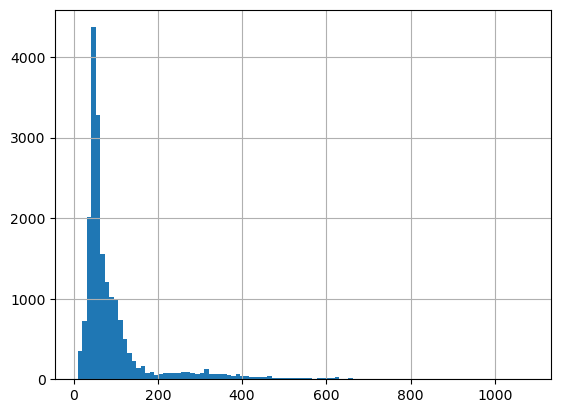

In [37]:
# target engineering
data['Appliances'].hist(bins=100)
plt.show()

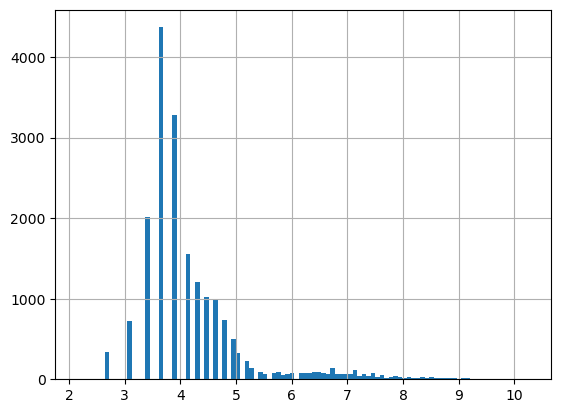

In [38]:
target = np.cbrt(data['Appliances']) # target transform
target.hist(bins=100)
plt.show()

In [40]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
# split data into training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score

# split train and test data and make sure that the test data is same as time series data to make a fair comparison
#train2_data = data.iloc[:-3974, :] 
#test2_data = data.iloc[-3974:, :]
x= data.drop(['Appliances','date','Windspeed','Visibility','Tdewpoint'],axis=1)
y=target
x_train_1, x_test_1, y_train, y_test = train_test_split(x, y, test_size=3974, random_state=42)
 
#x_train = train2_data.drop(['Appliances','date','Windspeed','Visibility','Tdewpoint'],axis=1)
#y_train = train2_data["Appliances"]
#x_test = test2_data.drop(['Appliances','date','Windspeed','Visibility','Tdewpoint'],axis=1)
#y_test = test2_data["Appliances"]

#y_train=np.cbrt(y_train)
#y_test=np.cbrt(y_test)
#y_train = target[:-3974]
#y_test = target[-3974:]
# standardize the range of functionality of the input dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_1)
x_test= scaler.transform(x_test_1)

In [41]:
# three models
rd = Ridge(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

### 4. Train prediction models

### Time Seriers models

#### ARIMA

In [42]:
# using the chosen p,d,q to fit model
ARIMA_model = ARIMA(train_data, order=(7,0,3)).fit()
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Appliances   No. Observations:                15761
Model:                 ARIMA(7, 0, 3)   Log Likelihood              -88710.662
Date:                Sun, 30 Apr 2023   AIC                         177445.324
Time:                        12:50:20   BIC                         177537.307
Sample:                    01-11-2016   HQIC                        177475.769
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.0854      7.311     13.416      0.000      83.756     112.415
ar.L1          0.0753      0.114      0.660      0.509      -0.148       0.299
ar.L2          0.8248      0.108      7.633      0.000       0.613       1.037
ar.L3          0.3550      0.121      2.928      0.003       0.117       0.593
ar.L4         -0.4493      0.076     -5.880      0.000      -0.599      -0.300
ar.L5          0.1315      0.023      5.708      0.000       0.086       0.177
ar.L6         -0.0243      0.011     -2.234      0.026      -0.046      -0.003
ar.L7          0.0096      0.009      1.101      0.271      -0.007       0.027
ma.L1          0.7259      0.114      6.370      0.000       0.503       0.949
ma.L2         -0.4285      0.069     -6.247      0.000      -0.563      -0.294
ma.L3         -0.7453      0.095     -7.862      0.000      -0.931      -0.560
sigma2      4538.3095     21.769    208.473      0.000    4495.643    4580.976
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            361104.97
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             3.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
ARIMA_pred = ARIMA_model.forecast(3974)
result = pd.concat([test_data, ARIMA_pred], axis=1)

In [44]:
type(result)
result

,Appliances,predicted_mean
2016-04-30 03:50:00,60,61.464089
2016-04-30 04:00:00,60,64.097068
2016-04-30 04:10:00,60,66.390000
2016-04-30 04:20:00,40,67.721589
2016-04-30 04:30:00,50,69.407186
...,...,...
2016-05-27 17:20:00,100,98.085425
2016-05-27 17:30:00,90,98.085425
2016-05-27 17:40:00,270,98.085425
2016-05-27 17:50:00,420,98.085425


#### LSTM

In [66]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X,train_y,epochs=50,batch_size=32,verbose=2)

Epoch 1/50
613/613 - 8s - loss: 0.0057 - 8s/epoch - 14ms/step
Epoch 2/50
613/613 - 8s - loss: 0.0045 - 8s/epoch - 13ms/step
Epoch 3/50
613/613 - 8s - loss: 0.0041 - 8s/epoch - 13ms/step
Epoch 4/50
613/613 - 8s - loss: 0.0040 - 8s/epoch - 13ms/step
Epoch 5/50
613/613 - 8s - loss: 0.0039 - 8s/epoch - 13ms/step
Epoch 6/50
613/613 - 8s - loss: 0.0039 - 8s/epoch - 13ms/step
Epoch 7/50
613/613 - 8s - loss: 0.0038 - 8s/epoch - 13ms/step
Epoch 8/50
613/613 - 8s - loss: 0.0038 - 8s/epoch - 13ms/step
Epoch 9/50
613/613 - 8s - loss: 0.0038 - 8s/epoch - 13ms/step
Epoch 10/50
613/613 - 8s - loss: 0.0038 - 8s/epoch - 13ms/step
Epoch 11/50
613/613 - 8s - loss: 0.0038 - 8s/epoch - 13ms/step
Epoch 12/50
613/613 - 8s - loss: 0.0038 - 8s/epoch - 13ms/step
Epoch 13/50
613/613 - 8s - loss: 0.0038 - 8s/epoch - 13ms/step
Epoch 14/50
613/613 - 8s - loss: 0.0038 - 8s/epoch - 13ms/step
Epoch 15/50
613/613 - 8s - loss: 0.0038 - 8s/epoch - 13ms/step
Epoch 16/50
613/613 - 8s - loss: 0.0038 - 8s/epoch - 13ms/step
E

### Machine Learning Methods

#### Ridge

In [46]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

# cross validation
folds=5

model_cv = GridSearchCV(estimator = rd, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
-0.6319610574457293


#### Random Forest Regressor

In [48]:
params = {'n_estimators': [500, 600, 800, 1000],'max_depth':[8,15]}

# cross validation
folds = 5
model_cv_1 = GridSearchCV(estimator = rf, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)

model_cv_1.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 15],
                         'n_estimators': [500, 600, 800, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
print(model_cv_1.best_params_)
print(model_cv_1.best_score_)

{'max_depth': 15, 'n_estimators': 1000}
-0.4226407806215646


#### Gradient Boosting Regressor

In [50]:
# GradientBoostingRegressor
params = {'max_depth': [1,2,3,4,5]}

# cross validation
folds = 5
model_cv_2 = GridSearchCV(estimator = gb, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_2.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5]}, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [51]:
print(model_cv_2.best_params_)
print(model_cv_2.best_score_)

{'max_depth': 5}
-0.5019608651201592


### 5. Test predictin models and show results

We use the same performance metrics as we selected in Assignment 1, and show the results for all models. We use the R2 score (pronounced R-Squared Score) to shows how well the data fit the regression model. The value of R2 ranges from 0 to 1, with values closer to 1 indicating a better fit of the model to the observed data. We also use RMSE(Root mean square error)to evaluate the quality of predictions. The lower the RMSE, the better the model and its predictions.

#### ARIMA

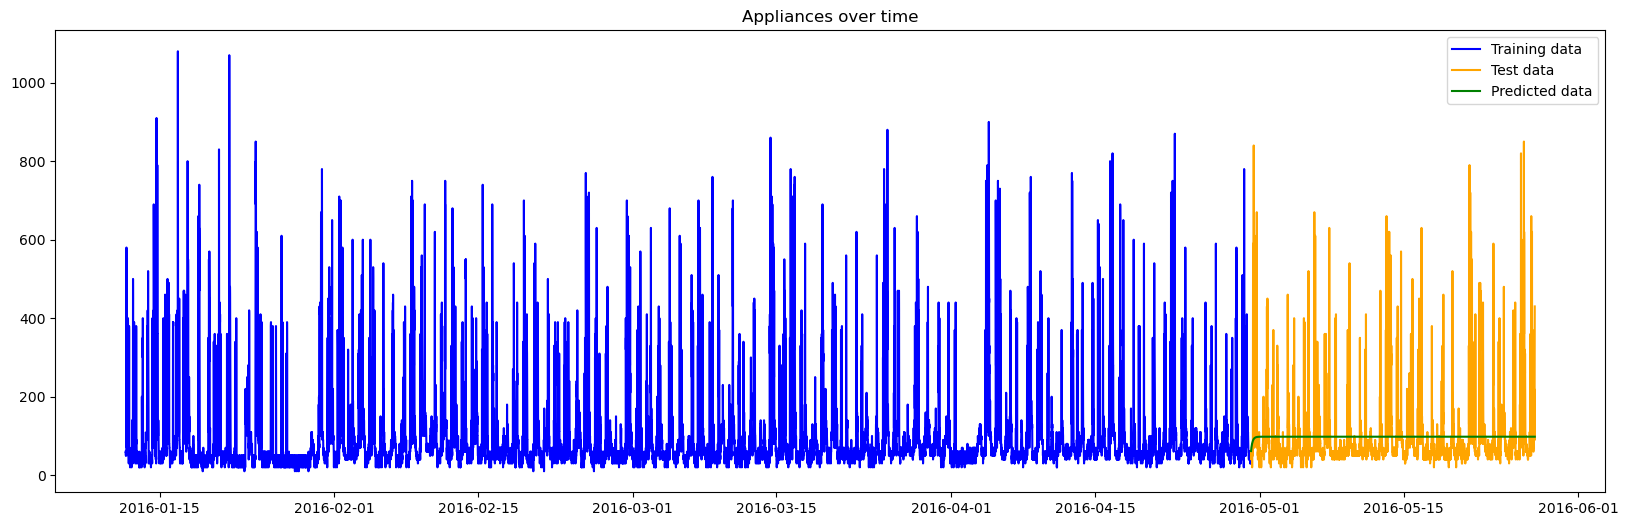

In [52]:
#plot
plt.figure(figsize=(20,6))
plt.plot(train_data,color='blue')
plt.plot(test_data,color='orange')
plt.plot(test_data.index,ARIMA_pred,color='green')
plt.legend(['Training data','Test data','Predicted data'])
plt.title('Appliances over time')
plt.show()

In [53]:
# r2 score 
r2_ar=metrics.r2_score(test_data,ARIMA_pred)
r2_ar

-0.0018748242636263956

In [54]:
# rmse
from sklearn.metrics import mean_squared_error
print ('RMSE for Ridge Regression model is: \n',np.sqrt(mean_squared_error(test_data,ARIMA_pred)))
rmse_ar=np.sqrt(mean_squared_error(test_data,ARIMA_pred))

RMSE for Ridge Regression model is: 
 90.94461519967874


#### LSTM

In [67]:
from sklearn.preprocessing import MinMaxScaler
# make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([test_y])

613/613 [==============================] - 4s 6ms/step


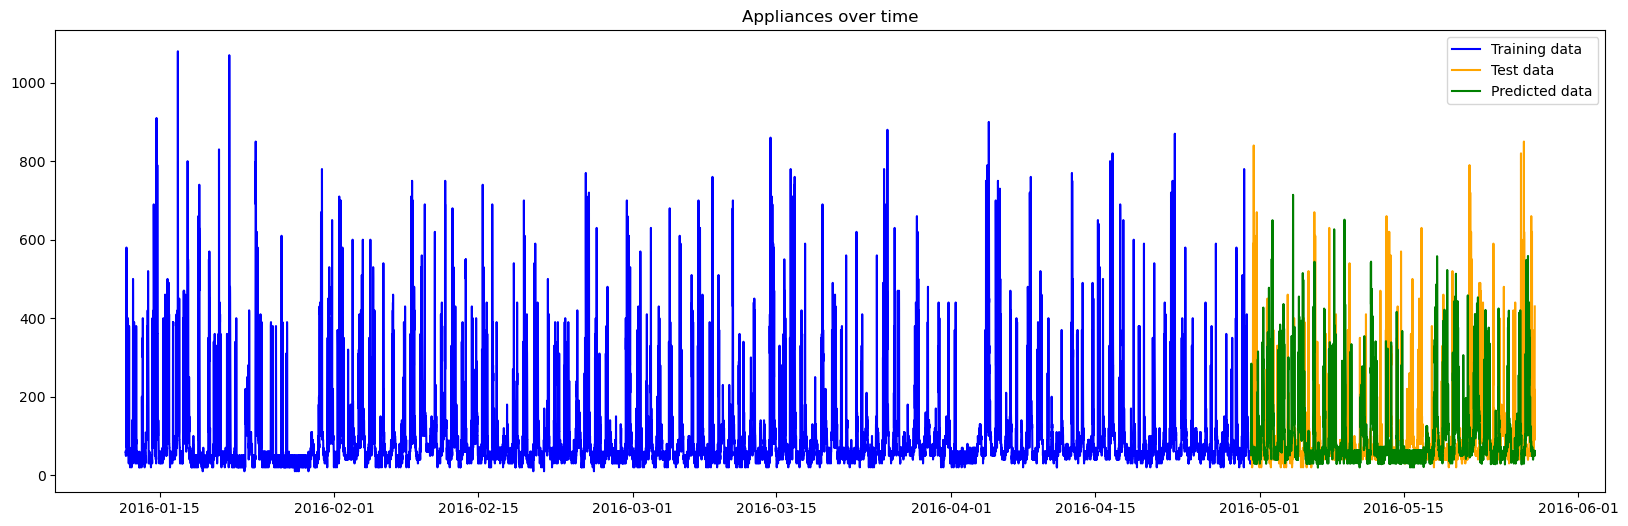

In [68]:
plt.figure(figsize=(20,6))
plt.plot(train_data,color='blue')
plt.plot(test_data,color='orange')
plt.plot(test_data.index, testPredict [:3974], color='green')
plt.legend(['Training data','Test data','Predicted data'])
plt.title('Appliances over time')
plt.show()

In [69]:
# r2 score 
r2_lstm=metrics.r2_score(testy[0], testPredict[:,0])
r2_lstm



0.5976551642303003

In [70]:
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(testy[0], testPredict[:,0]))

rmse_lstm = np.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 64.97 RMSE


### Machine Learning Methods

#### Ridge

In [71]:
#final ridge model
alpha = 50
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train)
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(x_train)

# r2 score 
rd_score_train=metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
rd_score_train

0.2356098862228414

In [72]:
# r2 score
y_test_pred = ridge.predict(x_test)
rd_score_test=metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
rd_score_test

0.24609064538014147

In [73]:
from sklearn.metrics import mean_squared_error
print ('RMSE for Ridge Regression model is: \n',np.sqrt(mean_squared_error(y_test, y_test_pred)))
rmse_rd=np.sqrt(mean_squared_error(y_test, y_test_pred))

RMSE for Ridge Regression model is: 
 0.9337942259305366


#### Random Forest Regressor

In [74]:
#final RandomForestRegressor

rf = RandomForestRegressor(max_depth=15, n_estimators=1000,random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=1000, random_state=42)

In [75]:
# r2 
rf_test_pred = rf.predict(x_test)
rf_score_test=metrics.r2_score(y_true=y_test, y_pred=rf_test_pred)
rf_score_test

0.6259984983017579

In [76]:
# rmse
print ('RMSE for RandomForest model is: \n', np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred)))
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred))

RMSE for RandomForest model is: 
 0.6577006803241414


#### Gradient Boosting Regressor

In [77]:
#final GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=5,random_state=42)
gb.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

In [78]:
# r2
gb_test_pred = gb.predict(x_test)
gb_score_test=metrics.r2_score(y_true=y_test, y_pred=gb_test_pred)
gb_score_test

0.4751601223660469

In [79]:
# rmse 
print ('RMSE for Gradient Boosting model is: \n', np.sqrt(metrics.mean_squared_error(y_test, gb_test_pred)))
rmse_gb= np.sqrt(metrics.mean_squared_error(y_test, gb_test_pred))

RMSE for Gradient Boosting model is: 
 0.7791212164220118


### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results



Compare the results from all candidate models, choose the best model.
* For a fair comparison, we retrained the model for assignmetn 1 and compared it under the same test set and performance metrics.

In [80]:
from pandas import Series,DataFrame
models = [
          {'Name':'Ridge Regression',
          'Test R\u00B2 score': rd_score_test,
          'RMSE test score': rmse_rd,
          },
          {'Name':'Random Forest Regressor',
          'Test R\u00B2 score': rf_score_test,
          'RMSE test score': rmse_rf,
          },
          {'Name':'Gradient Boosting Regressor',
          'Test R\u00B2 score': gb_score_test,
          'RMSE test score': rmse_gb},
          {'Name':'ARIMA',
          'Test R\u00B2 score': r2_ar,
          'RMSE test score': rmse_ar},
          {'Name':'LSTM',
          'Test R\u00B2 score': r2_lstm,
          'RMSE test score': rmse_lstm},  
         
         ]

models_com = pd.DataFrame(models)
models_com

,Name,Test R² score,RMSE test score
0,Ridge Regression,0.246091,0.933794
1,Random Forest Regressor,0.625998,0.657701
2,Gradient Boosting Regressor,0.475160,0.779121
3,ARIMA,-0.001875,90.944615
4,LSTM,0.597655,64.971538


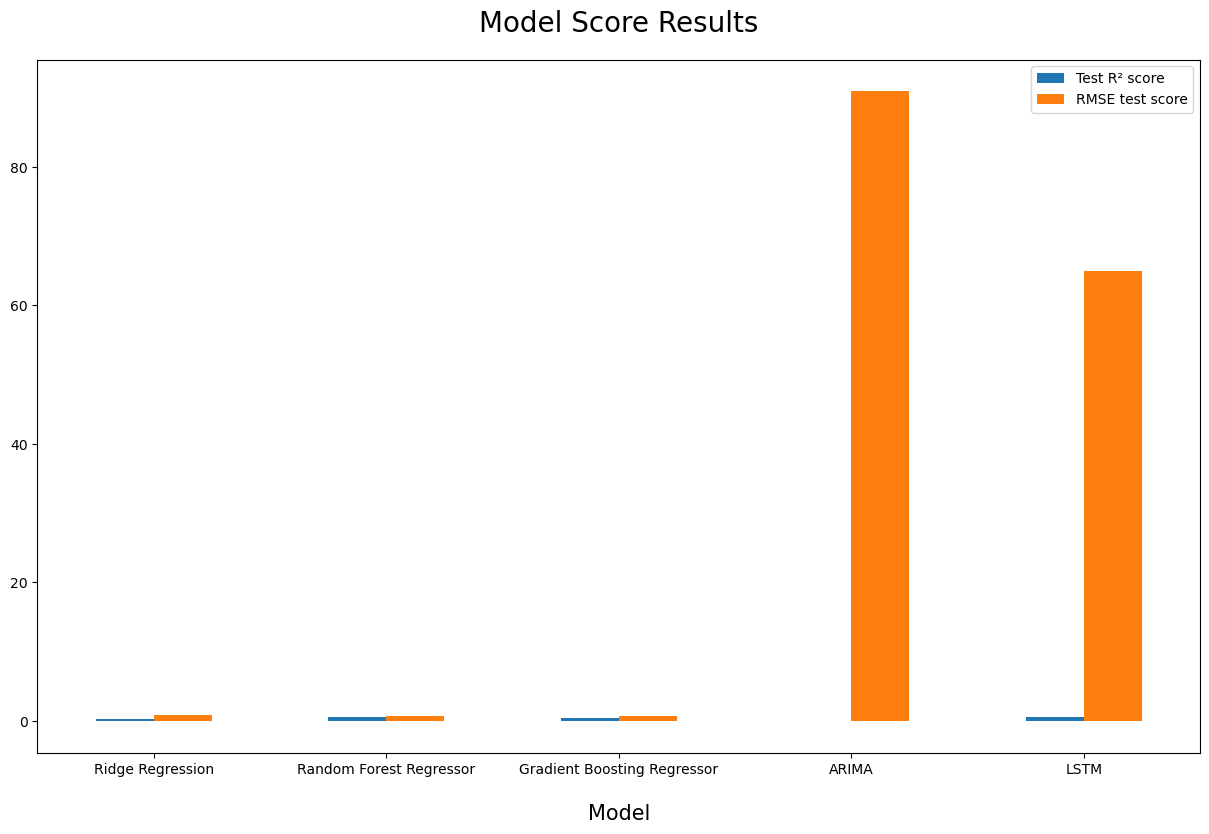

In [81]:
# plotting all model results
models_com.plot(figsize = (15,9), kind = 'bar', x = 'Name')
plt.title('Model Score Results', fontsize = 20, pad = 20)
plt.xlabel('Model', fontsize = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelrotation = 0)
plt.show()

#### Observation:
* The ARIMA model performed the worst, while the LSTM also performs very weakly, and we can guess that this dataset is not suitable for time series forecasting. 
* Of all the models tested,Random Forest Regression model performed best as it had the highest R^2 test score and the lowest root mean square error.

##### Choose the best performing model and show the final results

In [82]:
rf_test_pred

array([3.65231645, 4.67899025, 3.72394796, ..., 4.33595197, 4.76691986,
       4.16372983])

In [84]:
model_final = [
          {'Name':'Random Forest Regressor',
          'Test R\u00B2 score': rf_score_test,
          'RMSE test score': rmse_rf,}
         ]

model_final = pd.DataFrame( model_final)
model_final

,Name,Test R² score,RMSE test score
0,Random Forest Regressor,0.625998,0.657701


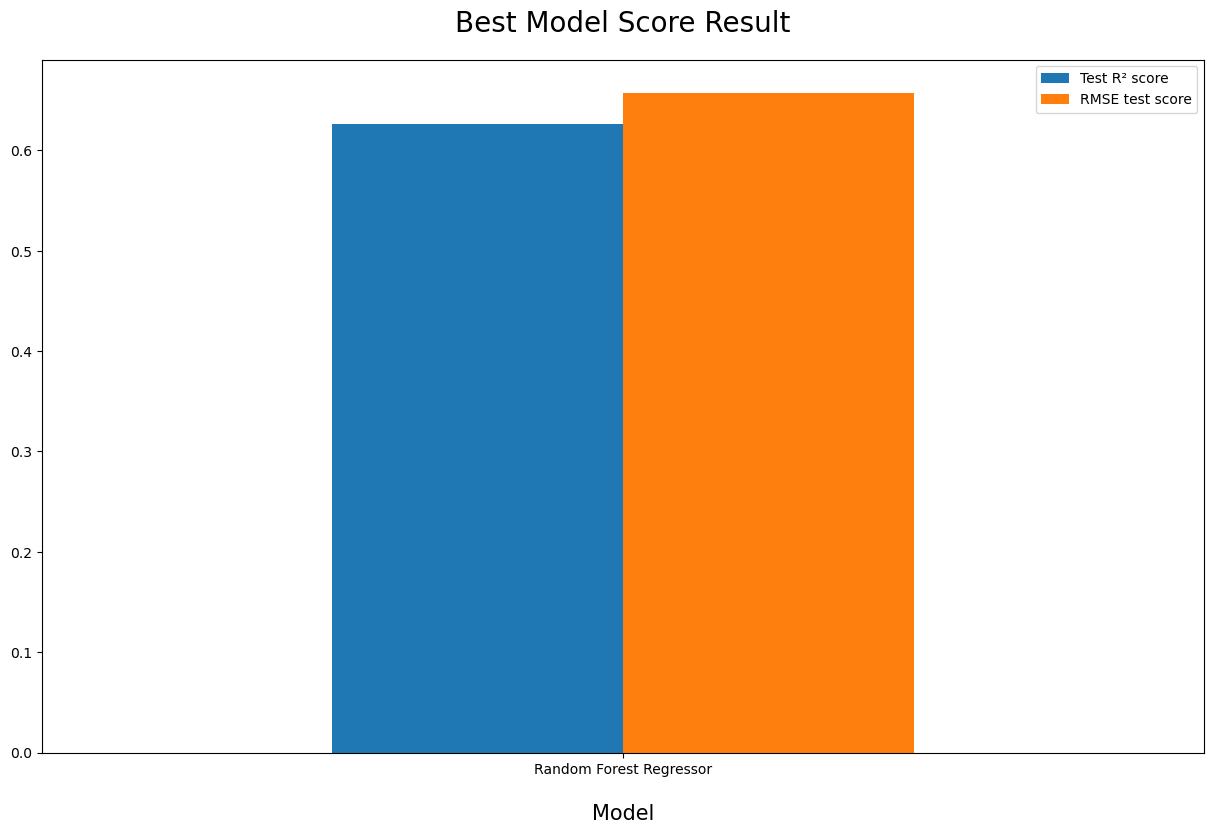

In [85]:
# plotting the random forest regressor results
model_final.plot(figsize = (15,9), kind = 'bar', x = 'Name')
plt.title('Best Model Score Result', fontsize = 20, pad = 20)
plt.xlabel('Model', fontsize = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelrotation = 0)
plt.show()

In [86]:
final_predictions = np.exp(rf_test_pred)
final_predictions

array([ 38.56389405, 107.66130643,  41.42762649, ...,  76.39765284,
       117.55659346,  64.31094483])

### 7. Reflect on what you have learned by completing this assignment

This assignment allowed me to deepen my understanding of time series analysis and machine learning techniques. I applied data pre-processing techniques from Assignment 1. I also conducted time series analysis using the STL time series decomposition method which enabled me to divide the time series into trend, seasonality, and residuals, facilitating the identification of trends and seasonality. Additionally, the ACF and PACF helped me to comprehend the autocorrelation and partial autocorrelation in the time series.

I learned that choosing the suitable model for the dataset is crucial for accurate forecasting. Comparing this assignment to Assignment 1, I realized that this dataset maybe not suitable for time series forecasting and feature selection is important. Furthermore, I retrained the model in Assignment 1 and utilized the same test set and same performance metrics for forecasting to ensure a fair comparison of the model results.

Throughout the assignment, I faced challenges in implementing time series forecasting, which required consulting course materials and seminars and referring to online code. However, I still need to improve my ability to tune the model parameters for better accuracy and reliability.


### 8. References

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp#:~:text=An%20autoregressive%20integrated%20moving%20average%2C%20or%20ARIMA%2C%20is%20a%20statistical,values%20based%20on%20past%20values.

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/